<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>✨ Predicting Car Price ✨</b></div>

<h3 align="center" style="font-size: 35px; color: #800080; font-family: Georgia;">
    <span style="color: #008080;"> Author:</span> 
    <span style="color: black;">Tushar Tomer .📄🖋️</span>
</h3>

# Objective and Problem Statement
### => The main aim of this project is to predict the price if cars using various Machine Learning (ML) models.
### => Examine underlying Data insights which enable to buyer to purchase the car based in some factors and from business point of view which variables are significant in predicting the price of a car and How well those variables describe the price of a car.

In [5]:
# pip install catboost

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📚 Importing Libraries 📚</b></div>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
 



# Display all the columns

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Display All The Columns </b></div>

In [7]:
pd.set_option("display.max_columns",None)

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Loading Datset ⏳</b></div>

In [8]:
df=pd.read_csv("cars_engage_2022.csv")
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🧠 Basic Understanding of Data 🧠</b></div>

# Checking Head of the data

In [9]:
df.head(2)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

# Checking Shape

In [10]:
df.shape

(1276, 141)

# Droping Unnamed column(Irrelevant)

In [11]:
df.drop(columns=["Unnamed: 0"],inplace=True)

# Checking Shape

In [12]:
df.shape

(1276, 140)

# Checking Information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


# Checking Data Type

In [14]:
df.dtypes

Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
Displacement          object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 140, dtype: object

In [15]:
for i in df:
    print(i,"====>",df[i].dtypes)

Make ====> object
Model ====> object
Variant ====> object
Ex-Showroom_Price ====> object
Displacement ====> object
Cylinders ====> float64
Valves_Per_Cylinder ====> float64
Drivetrain ====> object
Cylinder_Configuration ====> object
Emission_Norm ====> object
Engine_Location ====> object
Fuel_System ====> object
Fuel_Tank_Capacity ====> object
Fuel_Type ====> object
Height ====> object
Length ====> object
Width ====> object
Body_Type ====> object
Doors ====> float64
City_Mileage ====> object
Highway_Mileage ====> object
ARAI_Certified_Mileage ====> object
ARAI_Certified_Mileage_for_CNG ====> object
Kerb_Weight ====> object
Gears ====> object
Ground_Clearance ====> object
Front_Brakes ====> object
Rear_Brakes ====> object
Front_Suspension ====> object
Rear_Suspension ====> object
Front_Track ====> object
Rear_Track ====> object
Front_Tyre_&_Rim ====> object
Rear_Tyre_&_Rim ====> object
Power_Steering ====> object
Power_Windows ====> object
Power_Seats ====> object
Keyless_Entry ====> ob

In [16]:
df.columns # (.... is called elipses )

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

# Check null values of each column

In [17]:
df.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

# Check null percentage of each column

In [18]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"====>",df[i].isnull().sum()*100/df.shape[0])

Make ====> 5.877742946708464
Displacement ====> 0.9404388714733543
Cylinders ====> 5.172413793103448
Valves_Per_Cylinder ====> 7.993730407523511
Drivetrain ====> 0.54858934169279
Cylinder_Configuration ====> 1.0188087774294672
Emission_Norm ====> 0.8620689655172413
Engine_Location ====> 3.3699059561128526
Fuel_System ====> 0.6269592476489029
Fuel_Tank_Capacity ====> 5.407523510971787
Height ====> 0.07836990595611286
Width ====> 0.9404388714733543
Body_Type ====> 0.4702194357366771
Doors ====> 0.31347962382445144
City_Mileage ====> 43.495297805642636
Highway_Mileage ====> 62.69592476489028
ARAI_Certified_Mileage ====> 8.934169278996865
ARAI_Certified_Mileage_for_CNG ====> 97.88401253918495
Kerb_Weight ====> 28.605015673981192
Gears ====> 8.22884012539185
Ground_Clearance ====> 22.648902821316614
Front_Brakes ====> 1.9592476489028212
Rear_Brakes ====> 1.9592476489028212
Front_Suspension ====> 4.623824451410658
Rear_Suspension ====> 3.605015673981191
Front_Track ====> 52.27272727272727
Re

# Drop the column which have missing value is greater than 70%

In [19]:
for i in df.columns:
    if df[i].isnull().sum()*100/df.shape[0]>70:
        df.drop(columns=[i],inplace=True)

# Checking shape after droping the column

In [20]:
df.shape

(1276, 115)

# Seggregate the numeric and object(categorical) types columns then we can work properly

In [21]:
numeric=["int32","float64"]
df_numeric=df.select_dtypes(include=numeric)

# Checking shape of numeric column

In [22]:
df_numeric.shape

(1276, 5)

In [23]:
df_numeric

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,2.0,2.0,5.0,4.0,NaN
1,2.0,2.0,5.0,4.0,NaN
2,2.0,2.0,4.0,4.0,NaN
3,2.0,2.0,5.0,4.0,NaN
4,2.0,2.0,5.0,4.0,NaN
...,...,...,...,...,...
1271,4.0,4.0,4.0,5.0,2.0
1272,4.0,4.0,4.0,5.0,6.0
1273,4.0,4.0,4.0,5.0,6.0
1274,4.0,4.0,4.0,5.0,2.0


In [24]:
type(np.nan)

float

# Checking null values

In [25]:
df_numeric.isnull().sum()

Cylinders               66
Valves_Per_Cylinder    102
Doors                    4
Seating_Capacity         6
Number_of_Airbags      135
dtype: int64

# Filling null values of numeric column

In [26]:
for i in df_numeric:
    if df_numeric[i].isnull().sum()>0:
        df_numeric[i]=df_numeric[i].fillna(df_numeric[i].median())

# Check null values after fill the null values

In [27]:
df_numeric.isnull().sum()

Cylinders              0
Valves_Per_Cylinder    0
Doors                  0
Seating_Capacity       0
Number_of_Airbags      0
dtype: int64

# Missing value have been filled in the numeric columns

# Now we will be working on columns of object type

In [28]:
df_obj=df.select_dtypes(include="object")

# Checking head of object columns

In [29]:
df_obj.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 Kms (years/distance whichever c...,NaN,Internal,110 litres,NaN,NaN,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,NaN,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,NaN,NaN,NaN,710 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin

# Checking shape of object column

In [30]:
df_obj.shape

(1276, 110)

# Check column name

In [31]:
df_obj.head().columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_System',
       ...
       'iPod_Compatibility', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'ISOFIX_(Child-Seat_Mount)',
       'Rain_Sensing_Wipers', 'Leather_Wrapped_Steering',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
      dtype='object', length=110)

# Make a list of important columns

In [32]:
df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage','Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control']
len(df_obj_list)




45

# Fetch important columns

In [33]:
df_obj=df_obj.loc[:,df_obj_list]
df_obj.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,CNG,NaN,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,21.9 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,94 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check length of columns

In [34]:
len(df_obj.columns)

45

# Checking missing values 

In [35]:
for i in df_obj.columns:
    print(i,"====>",df[i].isnull().sum())

Make ====> 75
Model ====> 0
Variant ====> 0
Ex-Showroom_Price ====> 0
Displacement ====> 12
Drivetrain ====> 7
Emission_Norm ====> 11
Keyless_Entry ====> 274
Power ====> 0
Torque ====> 2
Odometer ====> 43
Speedometer ====> 45
Tachometer ====> 13
Tripmeter ====> 60
Fuel_Type ====> 0
ARAI_Certified_Mileage ====> 114
Front_Suspension ====> 59
Rear_Suspension ====> 46
Ground_Clearance ====> 289
Boot_Space ====> 249
Audiosystem ====> 44
Third_Row_AC_Vents ====> 366
Ventilation_System ====> 35
Auto-Dimming_Rear-View_Mirror ====> 620
Hill_Assist ====> 796
Gear_Indicator ====> 499
ABS_(Anti-lock_Braking_System) ====> 132
EBD_(Electronic_Brake-force_Distribution) ====> 201
Gear_Shift_Reminder ====> 543
Adjustable_Steering_Column ====> 191
Parking_Assistance ====> 290
Key_Off_Reminder ====> 340
USB_Compatibility ====> 267
EBA_(Electronic_Brake_Assist) ====> 690
Seat_Height_Adjustment ====> 326
Navigation_System ====> 593
Second_Row_AC_Vents ====> 602
Rear_Center_Armrest ====> 559
ESP_(Electronic

# Check missing values in percentage

In [36]:
for i in df_obj.columns:
    if df[i].isnull().sum()>0:
        print(i,"====>",df[i].isnull().sum()*100/df.shape[0])

Make ====> 5.877742946708464
Displacement ====> 0.9404388714733543
Drivetrain ====> 0.54858934169279
Emission_Norm ====> 0.8620689655172413
Keyless_Entry ====> 21.473354231974923
Torque ====> 0.15673981191222572
Odometer ====> 3.3699059561128526
Speedometer ====> 3.5266457680250785
Tachometer ====> 1.0188087774294672
Tripmeter ====> 4.702194357366771
ARAI_Certified_Mileage ====> 8.934169278996865
Front_Suspension ====> 4.623824451410658
Rear_Suspension ====> 3.605015673981191
Ground_Clearance ====> 22.648902821316614
Boot_Space ====> 19.5141065830721
Audiosystem ====> 3.4482758620689653
Third_Row_AC_Vents ====> 28.683385579937305
Ventilation_System ====> 2.74294670846395
Auto-Dimming_Rear-View_Mirror ====> 48.58934169278997
Hill_Assist ====> 62.38244514106583
Gear_Indicator ====> 39.106583072100314
ABS_(Anti-lock_Braking_System) ====> 10.344827586206897
EBD_(Electronic_Brake-force_Distribution) ====> 15.752351097178684
Gear_Shift_Reminder ====> 42.55485893416928
Adjustable_Steering_Col

In [37]:
df_obj.head(2)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check unique values in Make Column.

In [38]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

# Check unique values of Model Column.

In [39]:
df_obj["Model"].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

In [40]:
df_obj[["Make","Model"]][0:60]

,Make,Model
0,Tata,Nano Genx
1,Tata,Nano Genx
2,Tata,Nano Genx
3,Tata,Nano Genx
4,Tata,Nano Genx
5,Tata,Nano Genx
6,Datsun,Redi-Go
7,Datsun,Redi-Go
8,Datsun,Redi-Go
9,Datsun,Redi-Go


In [41]:
# df_obj[df_obj[""]==""]

In [42]:
df_obj[df_obj["Make"]=="Land Rover Rover"]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
789,Land Rover Rover,Range Evoque,S,"Rs. 54,94,000",1999 cc,AWD (All Wheel Drive),BS 6,Smart Key,179PS@4000rpm,430NM@1750-2500rpm,Digital,Analog,Analog,Yes,Diesel,15.6 km/litre,MacPherson Strut,Multi - link,210 mm,NaN,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
790,Land Rover Rover,Range Evoque,Se R-Dynamic,"Rs. 59,85,000",1999 cc,AWD (All Wheel Drive),BS 6,Smart Key,179PS@4000rpm,430NM@1750-2500rpm,Digital,Analog,Analog,Yes,Diesel,15.6 km/litre,MacPherson Strut,Multi - link,210 mm,NaN,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
791,Land Rover Rover,Range Evoque,S Petrol,"Rs. 54,94,000",1997 cc,AWD (All Wheel Drive),BS 6,Smart Key,245PS@5500rpm,365Nm@1500-4500rpm,Digital,Analog,Analog,Yes,Petrol,NaN,MacPherson Strut,Multi - link,210 mm,NaN,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
792,Land Rover Rover,Range Evoque,Se R-Dynamic Petrol,"Rs. 59,85,000",1997 cc,AWD (All Wheel Drive),BS 6,Smart Key,245PS@5500rpm,365Nm@1500-4500rpm,Digital,Analog,Analog,Yes,Petrol,NaN,MacPherson Strut,Multi - link,210 mm,NaN,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
818,Land Rover Rover,Range Evoque Convertible,2.0 Hse Dynamic,"Rs. 69,52,964",1998 cc,4WD,BS IV,Smart Key,240PS@5500rpm,340NM@1500rpm,Digital,Analog,Analog,Yes,Petrol,15.7 km/litre,MacPherson Strut,Multi - link,NaN,251 litres,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
819,Land Rover Rover,Range Velar,2.0 Diesel R-Dynamic S,"Rs. 72,46,802",1999 cc,4WD,BS IV,Smart Key,179PS@4000rpm,430NM@1750-2500rpm,Digital,Analog,Analog,Yes,Diesel,15.7 km/litre,MacPherson Strut,Multi - link,NaN,NaN,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Manual Adjustment,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes
820,Land Rover Rover,Range Velar,2.0 Petrol R-Dynamic S,"Rs. 72,46,802",1997 cc,4WD,BS IV,Smart Key,250PS@5500RPM,365Nm@1500rpm,Digital,Analog,Analog,Yes,Petrol,12.63 km/litre,McPherson,Integral Coil Spring,NaN,NaN,CD Player with USB & Aux-in,NaN,2 Zone Climate Control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,NaN,Yes,Yes,Manual Adjustment,Yes,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes
827,Land Rover Rover,Range Sport,5.0L V8 Svr Petrol,"Rs. 2,05,17,853",4999 cc,4WD,NaN

# So from above output we can see the ambiguity in make and model columns with respect to land rover rover and maruti suzuki r and range , wago in make and model respectively so we replace land rover rover in  make with land rover and maruti suzuki r with maruti suzuki in make column and replace range with range rover and eagon with wagon r in model column

In [43]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [44]:
df_obj["Make"]=df_obj["Make"].replace("Maruti Suzuki R","Maruti Suzuki")
df_obj["Make"]=df_obj["Make"].replace("Land Rover Rover","Land Rover")

In [45]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia', 'Mitsubishi'],
      dtype=object)

In [46]:
df_obj["Model"].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

In [47]:
df_obj["Model"]=df_obj["Model"].replace("Range","Range Rover")
df_obj["Model"]=df_obj["Model"].replace("Wagon","Wagon R")

In [48]:
df_obj["Model"].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

# Handle all the column of object type one by one 

# Fill null values of Make Column with respect to Model.

In [49]:
x=df_obj[df_obj["Make"].isnull()][["Make","Model"]]
x

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
...,...,...
1151,NaN,Mercedes-Benz Gla-Class
1219,NaN,Rolls-Royce Phantom
1220,NaN,Rolls-Royce Phantom
1251,NaN,Mercedes-Benz Glc


In [50]:
x["Model"].unique()

array(['Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class',
       'Mercedes-Benz E-Class Cabriolet', 'Mercedes-Benz Gls',
       'Mercedes-Benz S-Class', 'Mercedes-Benz G-Class',
       'Mercedes-Benz Maybach', 'Mercedes-Benz S-Class Cabriolet',
       'Rolls-Royce Ghost Series Ii', 'Rolls-Royce Wraith',
       'Rolls-Royce Cullinan', 'Rolls-Royce Phantom Coupe',
       'Mercedes-Benz E-Class', 'Mercedes-Benz C-Class Cabriolet',
       'Mercedes-Benz V-Class', 'Mercedes-Benz E-Class All Terrain',
       'Mercedes-Benz Amg-Gt', 'Mercedes-Benz Amg Gt 4-Door Coupe',
       'Rolls-Royce Dawn', 'Rolls-Royce Drophead Coupe', 'Go+',
       'Mercedes-Benz A-Class', 'Mercedes-Benz C-Class',
       'Mercedes-Benz Gle', 'Mercedes-Benz Cls',
       'Mercedes-Benz Gla-Class', 'Rolls-Royce Phantom',
       'Mercedes-Benz Glc'], dtype=object)

In [51]:
type(df_obj["Make"].iloc[1252])

float

In [52]:
index=0
for i in df_obj["Model"]:
    f=i[0:3]
    if type(df_obj["Make"].iloc[index])==float:
        if f=="Mer":
            df_obj["Make"].iloc[index]="Mercedes-Benz"
        if f=="Rol":
            df_obj["Make"].iloc[index]="Rolls-Royce"
        if f=="Go+":
            df_obj["Make"].iloc[index]="Datsun"
    index=index+1

In [53]:
df_obj[df_obj["Make"]=="Rolls-Royce"]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
349,Rolls-Royce,Rolls-Royce Ghost Series Ii,6.6,"Rs. 4,67,09,733",6593 cc,RWD (Rear Wheel Drive),BS IV,Smart Key,563PS@5250rpm,780Nm@1700rpm,Digital,Analog,Analog,Yes,Petrol,17.3 km/litre,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,150 mm,490 litres,DVD Player with USB & Aux-in,NaN,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,NaN,Yes,Yes,Yes,Yes
350,Rolls-Royce,Rolls-Royce Ghost Series Ii,Ewb,"Rs. 5,32,47,201",6592 cc,RWD (Rear Wheel Drive),BS IV,Smart Key,570 bhp @ 5250 rpm,780 Nm @ 1500-5000 rpm,Digital,Analog,Analog,Yes,Petrol,7.29 km/litre,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,150 mm,490 litres,DVD Player with USB & Aux-in,NaN,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,NaN,Yes,Yes,Yes,Yes
351,Rolls-Royce,Rolls-Royce Wraith,Coupe,"Rs. 5,00,25,840",6592 cc,AWD (All Wheel Drive),BS IV,Smart Key,625PS@5600rpm,800Nm@1500-5500rpm,Digital,NaN,Yes,Yes,Petrol,10.2 km/litre,Double wishbone,Multi-Link,NaN,470 litres,NaN,NaN,"Fully automatic climate control, 2 Zone Climat...",NaN,NaN,Yes,Yes,Yes,NaN,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,NaN,Electric Adjustment with Memory,Yes,NaN,Yes,NaN,NaN,NaN,NaN,Yes,Yes,Yes
353,Rolls-Royce,Rolls-Royce Cullinan,Suv,"Rs. 6,95,00,000",6750 cc,AWD (All Wheel Drive),BS 6,NaN,563@5000rpm,850 Nm@1600rpm,NaN,NaN,NaN,NaN,Petrol,22.4-21.9 km/litre,Double wishbone front axle,5 Link Rear Suspension with Coil Spring,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
354,Rolls-Royce,Rolls-Royce Phantom Coupe,6.8 L,"Rs. 7,73,12,661",6749 cc,RWD (Rear Wheel Drive),BS IV,Smart Key,460PS@5350rpm,720Nm@3500rpm,Digital,Analog,Analog,Yes,Petrol,22.8 km/litre,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,164 mm,395 litres,DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,NaN,Yes,Yes,Yes,Yes
879,Rolls-Royce,Rolls-Royce Dawn,Convertible,"Rs. 5,92,16,193",6598 cc,RWD (Rear Wheel Drive),BS IV,Smart Key,571PS@6000RPM,780Nm@1500-5000RPM,Digital,Analog,Analog,Yes,Petrol,7.9 km/litre,Double wishbone front axle,Multi Link rear axle,208 mm,460 litres,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
880,Rolls-Royce,Rolls-Royce Drophead Coupe,Phantom,"Rs. 8,37,55,383",6749 cc,RWD (Rear Wheel Drive),BS IV,Smart Key,453PS@5350rpm,720Nm@3500rpm,Digital,Analog,Analog,Yes,Petrol,9.8 km/litre,Independent Double Wishbone with Air Springs,Independent Multi-Link with Air Springs,164 mm,460 litres,DVD Player with USB & Aux-in,Not Applicab

In [54]:
df_obj[df_obj["Make"]=="Datsun"]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
6,Datsun,Redi-Go,D,"Rs. 2,79,650",799 cc,FWD (Front Wheel Drive),BS IV,NaN,54PS@5678rpm,72Nm@4386rpm,Digital,Analog,Digital,Yes,Petrol,25.17 km/litre,Double Pivot Arm,H-type Torsion Beam,185 mm,222 litres,Not on offer,Not Applicable,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Datsun,Redi-Go,T,"Rs. 3,51,832",799 cc,FWD (Front Wheel Drive),BS IV,NaN,54PS@5678rpm,72Nm@4386rpm,Digital,Analog,Digital,Yes,Petrol,25.17 km/litre,Double Pivot Arm,H-type Torsion Beam,185 mm,222 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Datsun,Redi-Go,A,"Rs. 3,33,419",799 cc,FWD (Front Wheel Drive),BS IV,NaN,54PS@5678rpm,72Nm@4386rpm,Digital,Analog,Digital,Yes,Petrol,25.17 km/litre,Double Pivot Arm,H-type Torsion Beam,185 mm,222 litres,Not on offer,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Datsun,Redi-Go,S,"Rs. 3,62,000",799 cc,FWD (Front Wheel Drive),BS IV,NaN,54PS@5678rpm,72Nm@4386rpm,Digital,Analog,Digital,Yes,Petrol,25.17 km/litre,Double Pivot Arm,H-type Torsion Beam,185 mm,222 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Datsun,Redi-Go,1.0 S,"Rs. 3,90,000",999 cc,FWD (Front Wheel Drive),BS IV,NaN,68PS@5500rpm,91Nm@4250RPM,Digital,Analog,Digital,Yes,Petrol,22.5 km/litre,Double Pivot Arm,H-type Torsion Beam,185 mm,222 litres,CD Player with USB & Aux-in,Not Applicable,Air Conditioning with cooling only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Datsun,Redi-Go,1.0 S Amt,"Rs. 4,37,065",999 cc,FWD (Front Wheel Drive),BS IV,Yes,68PS@5500rpm,91Nm@4250RPM,Digital,Analog,Digital,Yes,Petrol,23 km/litre,Double Pivot Arm,H-type Torsion Beam,185 mm,222 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rear sensors,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Datsun,Go,D,"Rs. 3,74,990",1198 cc,FWD (Front Wheel Drive),BS IV,NaN,68PS@5000rpm,104Nm@4000rpm,Digital,Analog,Digital,2,Petrol,20.1 km/litre,MacPherson Strut with anti-roll bar,H-type Torsion Beam,180 mm,265 litres,Not on offer,Not Applicable,Heater,Yes,NaN,Yes,Yes,Yes,Yes,NaN,Rear sensors,NaN,NaN,Yes,Manual Adjustment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,Datsun,Go,T,"Rs. 4,68,229",1198 cc,FWD (Front Wheel Drive),BS IV,NaN,68PS@5000rpm,104Nm@4000rpm,Digital,Analog,"Analog, Digital",2,Petrol,20.1 km/litre,MacPherson Strut with anti-roll bar,H-type Torsion Beam,180 mm,265 litres,USB & Aux-in,Not Applicable,"Heater, Manual Air conditioning with cooling a...",Yes,NaN,Yes,Yes,Yes,Yes,NaN,Rear sensors,NaN,Yes,Yes,Manual Adjustment,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Datsun,Go,T (O),"Rs. 5,02,492",1198 cc,FWD (Front Wheel Drive),BS IV,NaN,68PS@5000rpm,104Nm@4000rpm,Digital,Analog,"Digital, Analog",2,Petrol,20.1 km/litre,MacPherson Strut with anti-roll b

In [55]:
df_obj[df_obj["Make"]=="Mercedes-Benz"]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
252,Mercedes-Benz,Mercedes-Benz B-Class,B 180 Sport,"Rs. 29,88,311",1595 cc,FWD (Front Wheel Drive),BS IV,Smart Key,122PS@5000rpm,200Nm@1250-4000rpm,Digital,Analog,Analog,Yes,Petrol,14.81 km/litre,McPherson Strut,Four Link,190 mm,488 litres,CD/MP3/DVD Player with USB & Aux-in,NaN,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,NaN,Yes,Yes,Yes,Yes
253,Mercedes-Benz,Mercedes-Benz B-Class,B 200 Cdi Sport,"Rs. 30,89,851",2143 cc,FWD (Front Wheel Drive),BS IV,Smart Key,136PS@4400RPM,300Nm@1600-3000rpm,Digital,Analog,Analog,Yes,Diesel,15 km/litre,McPherson strut front axle,4 link rear axle,190 mm,488 litres,CD/MP3/DVD Player with USB & Aux-in,NaN,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
254,Mercedes-Benz,Mercedes-Benz B-Class,B 180 Night Edition,"Rs. 31,98,662",1595 cc,FWD (Front Wheel Drive),BS IV,Smart Key,122PS@5000rpm,200Nm@1250-4000rpm,Digital,Analog,Analog,Yes,Petrol,14.81 km/litre,McPherson Strut,Four Link,190 mm,488 litres,CD/MP3/DVD Player with USB & Aux-in,NaN,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,NaN,Yes,Yes,Yes,Yes
255,Mercedes-Benz,Mercedes-Benz B-Class,B 200 Cdi Night Edition,"Rs. 33,03,282",2143 cc,FWD (Front Wheel Drive),BS IV,Smart Key,136PS@4400RPM,300Nm@1600-3000rpm,Digital,Analog,Analog,Yes,Diesel,15 km/litre,McPherson strut front axle,4 link rear axle,190 mm,488 litres,CD/MP3/DVD Player with USB & Aux-in,NaN,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
256,Mercedes-Benz,Mercedes-Benz Cla-Class,200 Sport,"Rs. 35,99,000",1991 cc,FWD (Front Wheel Drive),BS IV,Smart Key,183PS@5500rpm,300Nm@1200-4000rpm,Digital,Analog,Analog,Yes,Petrol,15.04 km/litre,McPherson Strut,Four-link,160 mm,470 litres,DVD Player with USB & Aux-in,Not Applicable,"Fully automatic climate control, 2 Zone Climat...",NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,NaN,Yes,Yes,Yes,Yes
257,Mercedes-Benz,Mercedes-Benz Cla-Class,200 Cdi Style,"Rs. 31,72,000",2143 cc,FWD (Front Wheel Drive),BS IV,Smart Key,136PS@4400RPM,300Nm@1600-3000rpm,Digital,Analog,Analog,Yes,Diesel,17.9 km/litre,McPherson Strut,Four-link,160 mm,470 litres,DVD Player with USB & Aux-in,Not Applicable,"Fully automatic climate control, 2 Zone Climat...",NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
258,Mercedes-Benz,Mercedes-Benz Cla-Class,200 D Sport,"Rs. 36,99,000",2143 cc,FWD (Front Wheel Drive),BS IV,Smart Key,136PS@4400RPM,300Nm@1600-3000rpm,Digital,Analog,Analog,Yes,Diesel,17.9 km/litre,McPherson Strut,Four-link,160 mm,470 litres,DVD Player with USB & Aux-in,Not Applicable,"Fully 

In [56]:
df_obj["Make"].iloc[0]

'Tata'

In [57]:
df_obj[["Make","Model"]]


,Make,Model
0,Tata,Nano Genx
1,Tata,Nano Genx
2,Tata,Nano Genx
3,Tata,Nano Genx
4,Tata,Nano Genx
...,...,...
1271,Honda,City
1272,Honda,City
1273,Honda,City
1274,Honda,City


In [58]:
df_obj["Make"].isnull().sum()

0

In [59]:
df_obj["Model"].isnull().sum()

0

In [60]:
df_obj[df_obj["Model"]=="Montero"]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1275,Mitsubishi,Montero,3.2 At,"Rs. 68,62,560",3200 cc,AWD (All Wheel Drive),BS IV,Yes,202ps@3800rpm,441Nm@2000rpm,Analog,"Analog, Digital",Analog,Yes,Diesel,11.56 km/litre,Double wishbone coil springs with stabilizer bar,Multi-link coil springs with stabilizer bar,235 mm,1050 litres,CD Player with USB & Aux-in,Yes,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,NaN,Yes,Yes


In [61]:
df_obj["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Mitsubishi'], dtype=object)

In [62]:
# Another way to fill the missing value :

In [63]:
# df_obj["Make"]=df_obj["Make"].combine_first(df_obj["Model"])
# df_obj["Make"]

In [64]:
# df_obj["Make"].unique()

In [65]:
# df_obj["Make"].isnull().sum()

In [66]:
# for i in df_obj["Make"]:
# if "Mercedes" in i :
# df_obj["Make"]=df_obj["Make"].replace(i,"Mercedes-Benz")
# else "Rolls" in i :
# df_obj["Make"]=df_obj["Make"].replace(i,"Rolls Royce")
# elif "Go" in i :
# df_obj["Make"]=df_obj["Make"].replace(i,"Datsun")

# Convert Ex-Showroom Price column of catergorical column to numeric column and remove all the ambiguity.

In [67]:
df_obj["Ex-Showroom_Price"].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)

In [68]:
df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace("Rs. ","")

C:\Users\hp\AppData\Local\Temp\ipykernel_13928\4170365268.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace("Rs. ","")


In [69]:
df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace(",","")

In [70]:
df_obj["Ex-Showroom_Price"].unique()

array(['292667', '236447', '296661', ..., '1431000', '1201000', '6862560'],
      dtype=object)

In [71]:
df_obj.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Drivetrain', 'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque',
       'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Cont

In [72]:
for i in df_obj.columns:
    print(i,"====>",df_obj[i].unique(),"\n")

Make ====> ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi'] 

Model ====> ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6' 'X3'


In [73]:
for i in df_obj.columns:
    if df_obj[i].isnull().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("not-present",inplace=True)
        elif i in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
            df_obj[i].fillna("undefined",inplace=True)
        else:
            df_obj[i].fillna(df_obj[i].mode()[0],inplace=True)
df_obj.isnull().sum().sum()

0

# Change column name

In [74]:
df_obj.rename(columns={"Ex-Showroom_Price":"Price"},inplace=True)

# Check unique values of Displacement column

In [75]:
df_obj["Displacement"].unique()

array(['624 cc', '799 cc', '999 cc', '1196 cc', '998 cc', '1198 cc',
       '1086 cc', '1199 cc', '1197 cc', '1173 cc', '1489 cc', '1248 cc',
       '1364 cc', '1193 cc', '1396 cc', '1186 cc', '1498 cc', '1194 cc',
       '1496 cc', '1461 cc', '1368 cc', '1956 cc', '2999 cc', '2157 cc',
       '1968 cc', '1997 cc', '1597 cc', '1798 cc', '1395 cc', '1595 cc',
       '2143 cc', '1991 cc', '2000 cc', '1998 cc', '1969 cc', '1999 cc',
       '1984 cc', '1995 cc', '2995 cc', '2993 cc', '2998 cc', '4951 cc',
       '2987 cc', '6417 cc', '3604 cc', '2996 cc', '2979 cc', '1988 cc',
       '5461 cc', '2982 cc', '3456 cc', '2894 cc', '6592 cc', '3982 cc',
       '2925 cc', '4691 cc', '5980 cc', '4663 cc', '3996 cc', '4461 cc',
       '5204 cc', '5998 cc', '3855 cc', '5950 cc', '5198 cc', '4497 cc',
       '6593 cc', '6752 cc', '6750 cc', '6749 cc', '7993 cc', '216 cc',
       '796 cc', '1120 cc', '1497 cc', '1994 cc', '1298 cc', '1397 cc',
       '1493 cc', '2523 cc', '1591 cc', '1582 cc', '1598 

# Remove disturbance of Displacement Column

In [76]:
df_obj["Displacement"]=df_obj["Displacement"].str.replace(" cc","")

In [77]:
df_obj["Displacement"].unique()

array(['624', '799', '999', '1196', '998', '1198', '1086', '1199', '1197',
       '1173', '1489', '1248', '1364', '1193', '1396', '1186', '1498',
       '1194', '1496', '1461', '1368', '1956', '2999', '2157', '1968',
       '1997', '1597', '1798', '1395', '1595', '2143', '1991', '2000',
       '1998', '1969', '1999', '1984', '1995', '2995', '2993', '2998',
       '4951', '2987', '6417', '3604', '2996', '2979', '1988', '5461',
       '2982', '3456', '2894', '6592', '3982', '2925', '4691', '5980',
       '4663', '3996', '4461', '5204', '5998', '3855', '5950', '5198',
       '4497', '6593', '6752', '6750', '6749', '7993', '216', '796',
       '1120', '1497', '1994', '1298', '1397', '1493', '2523', '1591',
       '1582', '1598', 'undefined', '2498', '2596', '2149', '1462',
       '2179', '72', '2393', '2694', '2755', '1799', '2199', '3198',
       '2198', '2400', '1950', '2967', '4999', '4367', '3993', '3902',
       '3900', '6262', '6498', '6598', '1172', '2489', '1353', '1500',
       '1

# Check unique values of Power Column.

In [78]:
df_obj["Power"].unique()

array(['38PS@5500rpm', '54PS@5678rpm', '68PS@5500rpm', '73PS@6000rpm',
       '74PS@6000RPM', '62PS@6000rpm', '68PS@6000rpm', '68PS@6200rpm',
       '59PS@6000rpm', '68PS@5000rpm', '78PS@5000rpm', '59bhp@6000rpm',
       '69PS@5500rpm', '59PS@5500RPM', '86PS@6000rpm', '83PS@6000rpm',
       '72PS@62050rpm', '76.6PS@5800rpm', '64PS@4000rpm', '72PS@4000rpm',
       '80PS@5600rpm', '68PS@3800rpm', '75PS@4000rpm', '90PS@5000rpm',
       '81.8bhp@6000rpm', '70bhp@4000RPM', '71PS@4000rpm',
       '69bhp@6000rpm', '84PS@6000rpm', '90PS@4000rpm', '69PS@6000rpm',
       '100PS@6000rpm', '76PS@6200RPM', '90PS@4200rpm', '105PS@5000rpm',
       '110PS@4400rpm', '84.3PS@6000rpm', '100PS@3750RPM', '96PS@6500rpm',
       '100PS@3700RPM', '96PS@6300rpm', '90PS@5600rpm', '65PS@4000rpm',
       '93PS@4000RPM', '140ps@5500rpm', '89PS@6000 rpm', '82PS@6000 rpm',
       '90PS@6000rpm', '100PS@3600rpm', '89 bhp@6000rpm', '173PS@3750rpm',
       '177PS@3600rpm', '178bhp@400rpm', '178Bhp @ 4000', '141PS@4000r

# Clean Power Column

In [79]:
df_obj["Power"]=df_obj["Power"].apply(lambda x : x[0:4])
df_obj["Power"].unique()

array(['38PS', '54PS', '68PS', '73PS', '74PS', '62PS', '59PS', '78PS',
       '59bh', '69PS', '86PS', '83PS', '72PS', '76.6', '64PS', '80PS',
       '75PS', '90PS', '81.8', '70bh', '71PS', '69bh', '84PS', '100P',
       '76PS', '105P', '110P', '84.3', '96PS', '65PS', '93PS', '140p',
       '89PS', '82PS', '89 b', '173P', '177P', '178b', '178B', '141P',
       '154P', '120P', '180P', '143P', '150P', '122P', '136P', '183P',
       '148b', '250P', '148h', '116P', '192P', '190b', '190P', '231h',
       '247P', '180p', '148 ', '245P', '248 ', '179P', '333P', '265H',
       '340H', '401P', '240P', '468 ', '286P', '334P', '410h', '300P',
       '258P', '557P', '262P', '450P', '265P', '340P', '609P', '275P',
       '350P', '430P', '585h', '289P', '460P', '299P', '630P', '453P',
       '550P', '261P', '455P', '610P', '650P', '590P', '560P', '608P',
       '605P', '563P', '570 ', '625P', '512P', '563@', '1479', '1600',
       '13bh', '12bh', '48PS', '47hp', '67PS', '77PS', '101.', '82hp',
      

In [80]:
l=[]
for i in df_obj["Power"]:
    s=""
    for j in i:
        if j.isdigit():
            s=s+j
    l.append(s)

In [81]:
l

['38',
 '38',
 '38',
 '38',
 '38',
 '38',
 '54',
 '54',
 '54',
 '54',
 '68',
 '68',
 '54',
 '54',
 '54',
 '54',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '73',
 '74',
 '73',
 '62',
 '62',
 '68',
 '68',
 '68',
 '68',
 '59',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '78',
 '78',
 '68',
 '59',
 '69',
 '69',
 '59',
 '69',
 '69',
 '59',
 '69',
 '69',
 '86',
 '86',
 '86',
 '86',
 '86',
 '86',
 '86',
 '86',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '68',
 '83',
 '83',
 '83',
 '83',
 '83',
 '83',
 '83',
 '72',
 '72',
 '72',
 '72',
 '766',
 '64',
 '766',
 '64',
 '64',
 '72',
 '80',
 '80',
 '68',
 '80',
 '68',
 '68',
 '80',
 '68',
 '80',
 '68',
 '80',
 '68',
 '80',
 '68',
 '68',
 '68',
 '68',
 '75',
 '75',
 '75',
 '75',
 '90',
 '90',
 '90',
 '90',
 '83',
 '83',
 '83',
 '818',
 '70',
 '71',
 '75',
 '83',
 '69',
 '84',
 '90',
 '84',
 '90',
 '84',
 '90',
 '84',
 '90',
 '83',
 '84',
 '84',
 '90',
 '83',
 '83',
 '83',
 '83',
 '83',
 '83',
 '69',
 '100',
 '75',
 '

In [82]:
len(l)

1276

In [83]:
df_obj.shape

(1276, 45)

In [84]:
df_obj["Power"].tail()

1271    100P
1272    100P
1273    119P
1274    119P
1275    202p
Name: Power, dtype: object

In [85]:
df_obj["Power"]=l

In [86]:
df_obj

,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,292667,624,RWD (Rear Wheel Drive),BS IV,Remote,38,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
1,Tata,Nano Genx,Xe,236447,624,RWD (Rear Wheel Drive),BS IV,not-present,38,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
2,Tata,Nano Genx,Emax Xm,296661,624,RWD (Rear Wheel Drive),BS IV,not-present,38,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,CNG,undefined,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
3,Tata,Nano Genx,Xta,334768,624,RWD (Rear Wheel Drive),BS IV,Remote,38,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,21.9 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,94 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-present,not-present,Yes,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
4,Tata,Nano Genx,Xm,272223,624,RWD (Rear Wheel Drive),BS IV,not-present,38,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,Vx Mt Diesel,1302000,1498,FWD (Front Wheel Drive),BS IV,Sma

In [87]:
df_obj["Power"].unique()

array(['38', '54', '68', '73', '74', '62', '59', '78', '69', '86', '83',
       '72', '766', '64', '80', '75', '90', '818', '70', '71', '84',
       '100', '76', '105', '110', '843', '96', '65', '93', '140', '89',
       '82', '173', '177', '178', '141', '154', '120', '180', '143',
       '150', '122', '136', '183', '148', '250', '116', '192', '190',
       '231', '247', '245', '248', '179', '333', '265', '340', '401',
       '240', '468', '286', '334', '410', '300', '258', '557', '262',
       '450', '609', '275', '350', '430', '585', '289', '460', '299',
       '630', '453', '550', '261', '455', '610', '650', '590', '560',
       '608', '605', '563', '570', '625', '512', '1479', '1600', '13',
       '12', '48', '47', '67', '77', '101', '117', '118', '114', '63',
       '639', '123', '106', '85', '128', '109', '115', '415', '119',
       '104', '121', '155', '41', '156', '166', '164', '174', '162',
       '163', '884', '142', '200', '160', '187', '372', '181', '184',
       '268', '54

In [88]:
df_obj.columns

Index(['Make', 'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
     

# Now clean the disturbance of ARAI_Certified_Mileage Column

In [89]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].apply(lambda x : x[0:4])
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', 'unde', '21.9', '25.1', '22.5', '23 k', '23.0', '24.0',
       '15 k', '20.1', '23.1', '20.3', '24 k', '20.8', '20.5', '16 k',
       '23.7', '18.1', '23.5', '18.9', '19.4', '22.9', '17.5', '15.7',
       '20 k', '28.4', '22 k', '18.6', '25.3', '20.4', '25.4', '18.7',
       '17.2', '19.9', '24.4', '19 k', '21.6', '21.7', '26.1', '16.7',
       '17.7', '20.0', '17.1', '23.8', '21.0', '19.5', '18.2', '27.3',
       '16.3', '13.8', '12.3', '12.0', '17.0', '14.4', '18.3', '13.7',
       '19.2', '14.8', '15.0', '17.9', '10 k', '16.9', '21.1', '14.5',
       '16.4', '11 k', '13.1', '19.3', '14.1', '18.5', '13.5', '13.3',
       '11.2', '13 k', '12.8', '8.61', '9.8-', '7.4 ', '11.6', '12 k',
       '11.1', '18 k', '10.8', '17.6', '11.8', '7.96', '7.8 ', '14 k',
       '7.9 ', '10.6', '6.71', '8.6 ', '9 km', '8.77', '17.3', '7.29',
       '10.2', '9.5 ', '22.4', '22.8', '5.95', '35 k', '22.0', '21.4',
       '19.7', '25.2', '25 k', '20.6', '27.4', '11.9', '23.9', '16.5',
      

In [90]:
df_obj['ARAI_Certified_Mileage']=df_obj['ARAI_Certified_Mileage'].str.replace(" km","").str.replace("km","").str.replace(" ","").str.replace("k","").str.replace("-","")

In [91]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', 'unde', '21.9', '25.1', '22.5', '23', '23.0', '24.0', '15',
       '20.1', '23.1', '20.3', '24', '20.8', '20.5', '16', '23.7', '18.1',
       '23.5', '18.9', '19.4', '22.9', '17.5', '15.7', '20', '28.4', '22',
       '18.6', '25.3', '20.4', '25.4', '18.7', '17.2', '19.9', '24.4',
       '19', '21.6', '21.7', '26.1', '16.7', '17.7', '20.0', '17.1',
       '23.8', '21.0', '19.5', '18.2', '27.3', '16.3', '13.8', '12.3',
       '12.0', '17.0', '14.4', '18.3', '13.7', '19.2', '14.8', '15.0',
       '17.9', '10', '16.9', '21.1', '14.5', '16.4', '11', '13.1', '19.3',
       '14.1', '18.5', '13.5', '13.3', '11.2', '13', '12.8', '8.61',
       '9.8', '7.4', '11.6', '12', '11.1', '18', '10.8', '17.6', '11.8',
       '7.96', '7.8', '14', '7.9', '10.6', '6.71', '8.6', '9', '8.77',
       '17.3', '7.29', '10.2', '9.5', '22.4', '22.8', '5.95', '35',
       '22.0', '21.4', '19.7', '25.2', '25', '20.6', '27.4', '11.9',
       '23.9', '16.5', '15.9', '24.3', '17', '19.6', '19.1', '16.0',

# There is a outlier in the data now check and correct the outlier.

In [92]:
df_obj[df_obj["ARAI_Certified_Mileage"]=='1449']

,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1036,Mercedes-Benz,Mercedes-Benz C-Class,C 43 Amg,7500000,3982,RWD (Rear Wheel Drive),BS 6,Smart Key,503,700Nm@1750RPM,Digital,Analog,Analog,Yes,Petrol,1449,AGILITY CONTROL suspension with selective damp...,AGILITY CONTROL suspension with selective damp...,112 mm,435 litres,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [93]:
df_obj["ARAI_Certified_Mileage"].iloc[1036]="14.49"

In [94]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', 'unde', '21.9', '25.1', '22.5', '23', '23.0', '24.0', '15',
       '20.1', '23.1', '20.3', '24', '20.8', '20.5', '16', '23.7', '18.1',
       '23.5', '18.9', '19.4', '22.9', '17.5', '15.7', '20', '28.4', '22',
       '18.6', '25.3', '20.4', '25.4', '18.7', '17.2', '19.9', '24.4',
       '19', '21.6', '21.7', '26.1', '16.7', '17.7', '20.0', '17.1',
       '23.8', '21.0', '19.5', '18.2', '27.3', '16.3', '13.8', '12.3',
       '12.0', '17.0', '14.4', '18.3', '13.7', '19.2', '14.8', '15.0',
       '17.9', '10', '16.9', '21.1', '14.5', '16.4', '11', '13.1', '19.3',
       '14.1', '18.5', '13.5', '13.3', '11.2', '13', '12.8', '8.61',
       '9.8', '7.4', '11.6', '12', '11.1', '18', '10.8', '17.6', '11.8',
       '7.96', '7.8', '14', '7.9', '10.6', '6.71', '8.6', '9', '8.77',
       '17.3', '7.29', '10.2', '9.5', '22.4', '22.8', '5.95', '35',
       '22.0', '21.4', '19.7', '25.2', '25', '20.6', '27.4', '11.9',
       '23.9', '16.5', '15.9', '24.3', '17', '19.6', '19.1', '16.0',

In [95]:
# Change 1449 value in 14.49

In [96]:
df_obj["ARAI_Certified_Mileage"].isnull().sum()

0

# Remove disturbance of Ground Clearance column and fix it.

In [97]:
df_obj['Ground_Clearance'].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', 'undefined',
       '170 mm', '182 mm', '200 mm', '154 mm', '163 mm', '190 mm',
       '174 mm', '172 mm', '205 mm', '220 mm', '149 mm', '198 mm',
       '208 mm', '164 mm', '161 mm', '211 mm', '146 mm', '125 mm',
       '100 mm', '212 mm', '167 mm', '152 mm', '137 mm', '206 mm',
       '210 mm', '307 mm', '140 mm', '109 mm', '241 mm', '215 mm',
       '110 mm', '142 mm', '119 mm', '130 mm', '113 mm', '150 mm',
       '175 mm', '209 mm', '195 mm', '133 mm', '225 mm', '188 mm',
       '179 mm', '136 mm', '157 mm', '201 mm', '155 mm', '498 mm',
       '218 mm', '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm',
       '135 mm', '186 mm', '192 mm', '132 mm', '112 mm', '213 mm',
       '121 mm', '122 mm', '108 mm', '183 mm', '158 mm', '124 mm',
       '138 mm', '235 mm'], dtype=object)

In [98]:
df_obj['Ground_Clearance']=df_obj['Ground_Clearance'].str.replace("mm","").str.replace(" ","")

In [99]:
df_obj['Ground_Clearance'].unique()

array(['180', '185', '184', '160', '165', 'undefined', '170', '182',
       '200', '154', '163', '190', '174', '172', '205', '220', '149',
       '198', '208', '164', '161', '211', '146', '125', '100', '212',
       '167', '152', '137', '206', '210', '307', '140', '109', '241',
       '215', '110', '142', '119', '130', '113', '150', '175', '209',
       '195', '133', '225', '188', '179', '136', '157', '201', '155',
       '498', '218', '238', '295.5', '227', '295', '128', '135', '186',
       '192', '132', '112', '213', '121', '122', '108', '183', '158',
       '124', '138', '235'], dtype=object)

In [100]:
df_obj["Boot_Space"].unique()

array(['110 litres', '94 litres', '222 litres', '300 litres',
       '400 litres', '250 litres', '177 litres', '265 litres',
       '235 litres', 'undefined', '242 litres', '240 litres',
       '260 litres', '625 litres', '454 litres', '251 litres',
       '210 litres', '407 litres', '320 litres', '316 litres',
       '285 litres', '280 litres', '378 litres', '257 litres',
       '330 litres', '592 litres', '339 litres', '354 litres',
       '438 litres', '615 litres', '522 litres', '150 litres',
       '425 litres', '488 litres', '470 litres', '460 litres',
       '278 litres', '215 litres', '432 litres', '360 litres',
       '480 litres', '455 litres', '505 litres', '520 litres',
       '560 litres', '550 litres', '650 litres', '1025 litres',
       '540 litres', '465 litres', '515 litres', '500 litres',
       '605 litres', '530 litres', '510 litres', '580 litres',
       '261 litres', '133 litres', '616 litres', '358 litres',
       '430 litres', '230 litres', '490 litres', '443 li

# Remove disturbance of Boot Space column and fix it.

In [101]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].apply(lambda x : x[0:4])
df_obj["Boot_Space"].unique()

array(['110 ', '94 l', '222 ', '300 ', '400 ', '250 ', '177 ', '265 ',
       '235 ', 'unde', '242 ', '240 ', '260 ', '625 ', '454 ', '251 ',
       '210 ', '407 ', '320 ', '316 ', '285 ', '280 ', '378 ', '257 ',
       '330 ', '592 ', '339 ', '354 ', '438 ', '615 ', '522 ', '150 ',
       '425 ', '488 ', '470 ', '460 ', '278 ', '215 ', '432 ', '360 ',
       '480 ', '455 ', '505 ', '520 ', '560 ', '550 ', '650 ', '1025',
       '540 ', '465 ', '515 ', '500 ', '605 ', '530 ', '510 ', '580 ',
       '261 ', '133 ', '616 ', '358 ', '430 ', '230 ', '490 ', '443 ',
       '395 ', '20 l', '256 ', '243 ', '268 ', '345 ', '419 ', '390 ',
       '420 ', '350 ', '1702', '328 ', '352 ', '475 ', '259 ', '207 ',
       '759 ', '494 ', '135 ', '255 ', '223 ', '600 ', '209 ', '384 ',
       '96 l', '128 ', '448 ', '324 ', '296 ', '211 ', '270 ', '380 ',
       '495 ', '1400', '281 ', '295 ', '909 ', '1761', '478 ', '645 ',
       '745 ', '770 ', '621 ', '535 ', '173 ', '165 ', '70 l', '450 ',
      

In [102]:
df_obj['Boot_Space']=df_obj['Boot_Space'].str.replace(" ","").str.replace("(","").str.replace("l","").str.replace(".","")

C:\Users\hp\AppData\Local\Temp\ipykernel_13928\3629850545.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_obj['Boot_Space']=df_obj['Boot_Space'].str.replace(" ","").str.replace("(","").str.replace("l","").str.replace(".","")


In [103]:
df_obj["Boot_Space"].unique()

array(['110', '94', '222', '300', '400', '250', '177', '265', '235',
       'unde', '242', '240', '260', '625', '454', '251', '210', '407',
       '320', '316', '285', '280', '378', '257', '330', '592', '339',
       '354', '438', '615', '522', '150', '425', '488', '470', '460',
       '278', '215', '432', '360', '480', '455', '505', '520', '560',
       '550', '650', '1025', '540', '465', '515', '500', '605', '530',
       '510', '580', '261', '133', '616', '358', '430', '230', '490',
       '443', '395', '20', '256', '243', '268', '345', '419', '390',
       '420', '350', '1702', '328', '352', '475', '259', '207', '759',
       '494', '135', '255', '223', '600', '209', '384', '96', '128',
       '448', '324', '296', '211', '270', '380', '495', '1400', '281',
       '295', '909', '1761', '478', '645', '745', '770', '621', '535',
       '173', '165', '70', '450', '525', '347', '363', '375', '392',
       '433', '981', '586', '341', '435', '825', '326', '368', '132',
       '249', '421'

# Remove disturbance of Ground Clearance column and fix it.

In [104]:
df_obj["Torque"].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

In [105]:
df_obj["Torque"]=df_obj["Torque"].apply(lambda x : x[0:4])
df_obj["Torque"].unique()

array(['51Nm', '72Nm', '91Nm', '101N', '85Nm', '90Nm', '78Nm', '104N',
       '99.0', '10.1', '8.3K', '114N', '113N', '96Nm', '103.', '152N',
       '183N', '170N', '190N', '140N', '115N', '220N', '95Nm', '172N',
       '230N', '175N', '250N', '215N', '120N', '132N', '160N', '209N',
       '210N', '110N', '200N', '110 ', '350N', '380N', '420N', '340N',
       '189N', '300N', '320N', '270N', '280N', '400N', '320 ', '365N',
       '430N', '250 ', '370N', '350 ', '500N', '620N', '450N', '515N',
       '570N', '624 ', '347N', '480N', '550N', '619N', '760N', '410N',
       '335N', '600N', '850N', '900N', '580N', '520N', '1000', '700N',
       '770N', '650N', '560N', '720N', '755N', '540N', '780N', '780 ',
       '800N', '1020', '850 ', '1600', '1479', '18.9', '16.1', '69Nm',
       '16.3', '240N', '103N', '112.', '1712', '22.4', '260N', '207N',
       '195N', 'unde', '150N', '205N', '142N', '245N', '151N', '155N',
       '133N', '153N', '70Nm', '105N', '145N', '247N', '321 ', '138N',
      

In [106]:
df_obj['Torque']=df_obj['Torque'].str.replace(" ","").str.replace("N","").str.replace("Nm","").str.replace("K","").str.replace("@","").str.replace("h","").str.replace("m","")
df_obj["Torque"].unique()

array(['51', '72', '91', '101', '85', '90', '78', '104', '99.0', '10.1',
       '8.3', '114', '113', '96', '103.', '152', '183', '170', '190',
       '140', '115', '220', '95', '172', '230', '175', '250', '215',
       '120', '132', '160', '209', '210', '110', '200', '350', '380',
       '420', '340', '189', '300', '320', '270', '280', '400', '365',
       '430', '370', '500', '620', '450', '515', '570', '624', '347',
       '480', '550', '619', '760', '410', '335', '600', '850', '900',
       '580', '520', '1000', '700', '770', '650', '560', '720', '755',
       '540', '780', '800', '1020', '1600', '1479', '18.9', '16.1', '69',
       '16.3', '240', '103', '112.', '1712', '22.4', '260', '207', '195',
       'unde', '150', '205', '142', '245', '151', '155', '133', '153',
       '70', '105', '145', '247', '321', '138', '330', '360', '343',
       '173', '174', '353', '440', '470', '385', '640', '625', '740',
       '689', '510', '630', '697', '690', '59', '197', '134', '130',
       '18

In [107]:
for column in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
    print(column,"====>",df_obj[column].unique(),"\n")

Torque ====> ['51' '72' '91' '101' '85' '90' '78' '104' '99.0' '10.1' '8.3' '114' '113'
 '96' '103.' '152' '183' '170' '190' '140' '115' '220' '95' '172' '230'
 '175' '250' '215' '120' '132' '160' '209' '210' '110' '200' '350' '380'
 '420' '340' '189' '300' '320' '270' '280' '400' '365' '430' '370' '500'
 '620' '450' '515' '570' '624' '347' '480' '550' '619' '760' '410' '335'
 '600' '850' '900' '580' '520' '1000' '700' '770' '650' '560' '720' '755'
 '540' '780' '800' '1020' '1600' '1479' '18.9' '16.1' '69' '16.3' '240'
 '103' '112.' '1712' '22.4' '260' '207' '195' 'unde' '150' '205' '142'
 '245' '151' '155' '133' '153' '70' '105' '145' '247' '321' '138' '330'
 '360' '343' '173' '174' '353' '440' '470' '385' '640' '625' '740' '689'
 '510' '630' '697' '690' '59' '197' '134' '130' '180' '225' '218' '144'
 '242' '248' '196' '192' '221' '369' '530' '637' '685' '718' '212' '222'
 '475' '680' '750' '546' '1130' '395' '660' '441'] 

ARAI_Certified_Mileage ====> ['23.6' 'unde' '21.9' '25.1' '22

In [108]:
for i in df_obj.columns:
    print(i,"====>",df_obj[i].unique(),"\n")

Make ====> ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi'] 

Model ====> ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X' 'Alturas G4' 'Tiguan' 'Cr-V'
 'Superb Sportline' 'A3' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class'
 'Kodiaq' 'Avanti' 'Q3' 'Cooper 5 Door' 'Convertible' 'Xc40' 'Clubman'
 'A4' 'John Cooper Works' 'Xe' 'Xf' 'A3 Cabriolet' 'A6' 'X3'


In [109]:
for i in df_obj.columns:
    print(i,"====>",df_obj[i].nunique(),"\n")

Make ====> 39 

Model ====> 263 

Variant ====> 1064 

Price ====> 1179 

Displacement ====> 130 

Drivetrain ====> 4 

Emission_Norm ====> 4 

Keyless_Entry ====> 6 

Power ====> 197 

Torque ====> 151 

Odometer ====> 5 

Speedometer ====> 6 

Tachometer ====> 8 

Tripmeter ====> 5 

Fuel_Type ====> 6 

ARAI_Certified_Mileage ====> 183 

Front_Suspension ====> 140 

Rear_Suspension ====> 173 

Ground_Clearance ====> 74 

Boot_Space ====> 138 

Audiosystem ====> 8 

Third_Row_AC_Vents ====> 3 

Ventilation_System ====> 16 

Auto-Dimming_Rear-View_Mirror ====> 2 

Hill_Assist ====> 2 

Gear_Indicator ====> 2 

ABS_(Anti-lock_Braking_System) ====> 2 

EBD_(Electronic_Brake-force_Distribution) ====> 2 

Gear_Shift_Reminder ====> 2 

Adjustable_Steering_Column ====> 5 

Parking_Assistance ====> 11 

Key_Off_Reminder ====> 2 

USB_Compatibility ====> 2 

EBA_(Electronic_Brake_Assist) ====> 2 

Seat_Height_Adjustment ====> 4 

Navigation_System ====> 2 

Second_Row_AC_Vents ====> 2 

Rear_C

# Replace undefined data of selected column into null values. 

In [110]:
l=["Torque","ARAI_Certified_Mileage","Boot_Space"]
for i in l:
    df_obj[i]=df_obj[i].replace("unde",np.nan)

In [111]:
l=["Displacement","Ground_Clearance"]
for i in l:
    df_obj[i]=df_obj[i].replace("undefined",np.nan)

In [112]:
df_obj["Boot_Space"].unique()

array(['110', '94', '222', '300', '400', '250', '177', '265', '235', nan,
       '242', '240', '260', '625', '454', '251', '210', '407', '320',
       '316', '285', '280', '378', '257', '330', '592', '339', '354',
       '438', '615', '522', '150', '425', '488', '470', '460', '278',
       '215', '432', '360', '480', '455', '505', '520', '560', '550',
       '650', '1025', '540', '465', '515', '500', '605', '530', '510',
       '580', '261', '133', '616', '358', '430', '230', '490', '443',
       '395', '20', '256', '243', '268', '345', '419', '390', '420',
       '350', '1702', '328', '352', '475', '259', '207', '759', '494',
       '135', '255', '223', '600', '209', '384', '96', '128', '448',
       '324', '296', '211', '270', '380', '495', '1400', '281', '295',
       '909', '1761', '478', '645', '745', '770', '621', '535', '173',
       '165', '70', '450', '525', '347', '363', '375', '392', '433',
       '981', '586', '341', '435', '825', '326', '368', '132', '249',
       '421', '

In [113]:
df_obj["Displacement"].unique()

array(['624', '799', '999', '1196', '998', '1198', '1086', '1199', '1197',
       '1173', '1489', '1248', '1364', '1193', '1396', '1186', '1498',
       '1194', '1496', '1461', '1368', '1956', '2999', '2157', '1968',
       '1997', '1597', '1798', '1395', '1595', '2143', '1991', '2000',
       '1998', '1969', '1999', '1984', '1995', '2995', '2993', '2998',
       '4951', '2987', '6417', '3604', '2996', '2979', '1988', '5461',
       '2982', '3456', '2894', '6592', '3982', '2925', '4691', '5980',
       '4663', '3996', '4461', '5204', '5998', '3855', '5950', '5198',
       '4497', '6593', '6752', '6750', '6749', '7993', '216', '796',
       '1120', '1497', '1994', '1298', '1397', '1493', '2523', '1591',
       '1582', '1598', nan, '2498', '2596', '2149', '1462', '2179', '72',
       '2393', '2694', '2755', '1799', '2199', '3198', '2198', '2400',
       '1950', '2967', '4999', '4367', '3993', '3902', '3900', '6262',
       '6498', '6598', '1172', '2489', '1353', '1500', '1596', '2487',
 

# Convert object columns into float columns

In [114]:
for i in ["Power","Torque","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_obj[i]=df_obj[i].astype("float64")

# Fill all the missing values of selected column.

In [115]:
for i in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
    df_obj[i]=df_obj[i].fillna(df_obj[i].mean())

# Check unique values of selected column.

In [116]:
for i in ["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
    print(i,"====>",df_obj[i].unique(),"\n")

Torque ====> [  51.           72.           91.          101.           85.
   90.           78.          104.           99.           10.1
    8.3         114.          113.           96.          103.
  152.          183.          170.          190.          140.
  115.          220.           95.          172.          230.
  175.          250.          215.          120.          132.
  160.          209.          210.          110.          200.
  350.          380.          420.          340.          189.
  300.          320.          270.          280.          400.
  365.          430.          370.          500.          620.
  450.          515.          570.          624.          347.
  480.          550.          619.          760.          410.
  335.          600.          850.          900.          580.
  520.         1000.          700.          770.          650.
  560.          720.          755.          540.          780.
  800.         1020.         1600.       

# Concat numerical and categorical column both.

In [117]:
df=pd.concat([df_numeric,df_obj],axis=1)
df.shape

(1276, 50)

In [118]:
df.head()

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
1,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
2,2.0,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,18.646876,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
3,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.900000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-present,not-present,Yes,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
4,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present


# Drop irrelavent column of Valves_Per_Cylinder Column

In [119]:
df.drop(columns=["Valves_Per_Cylinder"],inplace=True)

In [120]:
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,18.646876,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
3,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.900000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-present,not-present,Yes,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
4,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present


In [121]:
df.shape

(1276, 49)

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>📊 Exploratory Data Analysis 📊</b></div>

# Find the maximum , minimum and average price of car ?

# Find the details .

In [122]:
df["Price"].agg(["min","max","mean"])

min     2.364470e+05
max     2.121554e+08
mean    4.596538e+06
Name: Price, dtype: float64

In [123]:
df[df["Price"]==df["Price"].max()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1600.0,1479.0,Digital,Digital,Digital,Yes,Petrol,5.95,Runflat,Runflat,179.608916,387.5852,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not-present,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [124]:
df[df["Price"]==df["Price"].min()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


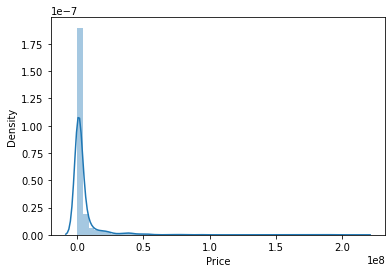

In [125]:
sns.distplot(df["Price"]);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


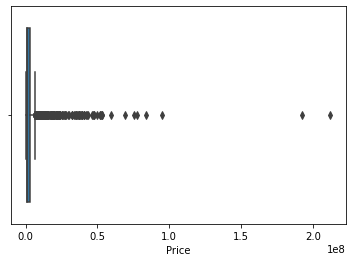

In [126]:
sns.boxplot(df["Price"]);

# How many cars which have less than average price ?

In [127]:
df["Price"].mean()

4596537.887147335

In [128]:
len(df[df["Price"]<4596537.887147335])

1032

# How many cars which have greater than average price ?

In [129]:
len(df[df["Price"]>4596537.887147335])

244

In [130]:
df_a=df[df["Price"]>=df["Price"].mean()][["Make","Model","Variant","Price"]]
df_a

,Make,Model,Variant,Price
278,Jaguar,Xe,Se Diesel,4633000.0
279,Jaguar,Xe,Se Petrol,4633000.0
280,Jaguar,Xf,2.0 Prestige,5436329.0
281,Jaguar,Xf,2.0 Portfolio,6073446.0
282,Jaguar,Xf,2.0 Portfolio Diesel,6138811.0
...,...,...,...,...
1253,Porsche,Cayenne Coupe,Base,13151000.0
1254,Porsche,Cayenne Coupe,Turbo,19763000.0
1263,Bentley,Flying Spur,V8,34167064.0
1264,Bentley,Flying Spur,W12,39382083.0


# How many companies whose price is greater than average price ?

In [131]:
df_a["Make"].unique()

array(['Jaguar', 'Audi', 'Bmw', 'Land Rover', 'Volvo', 'Ford', 'Jeep',
       'Mercedes-Benz', 'Porsche', 'Toyota', 'Lexus', 'Maserati',
       'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin', 'Rolls-Royce',
       'Bugatti', 'Nissan', 'Mitsubishi'], dtype=object)

# Which company has more or less number of cars ?

In [132]:
df_a["Make"].value_counts()

Mercedes-Benz    42
Land Rover       37
Bmw              31
Audi             21
Jaguar           20
Porsche          14
Lamborghini      13
Lexus            10
Maserati          9
Volvo             9
Rolls-Royce       9
Ferrari           8
Bentley           6
Jeep              5
Aston Martin      3
Toyota            2
Bugatti           2
Ford              1
Nissan            1
Mitsubishi        1
Name: Make, dtype: int64

In [133]:
df_a["Make"].nunique()

20

# Find out the average price of the car whose price is greater than average price of the cars in the data ?

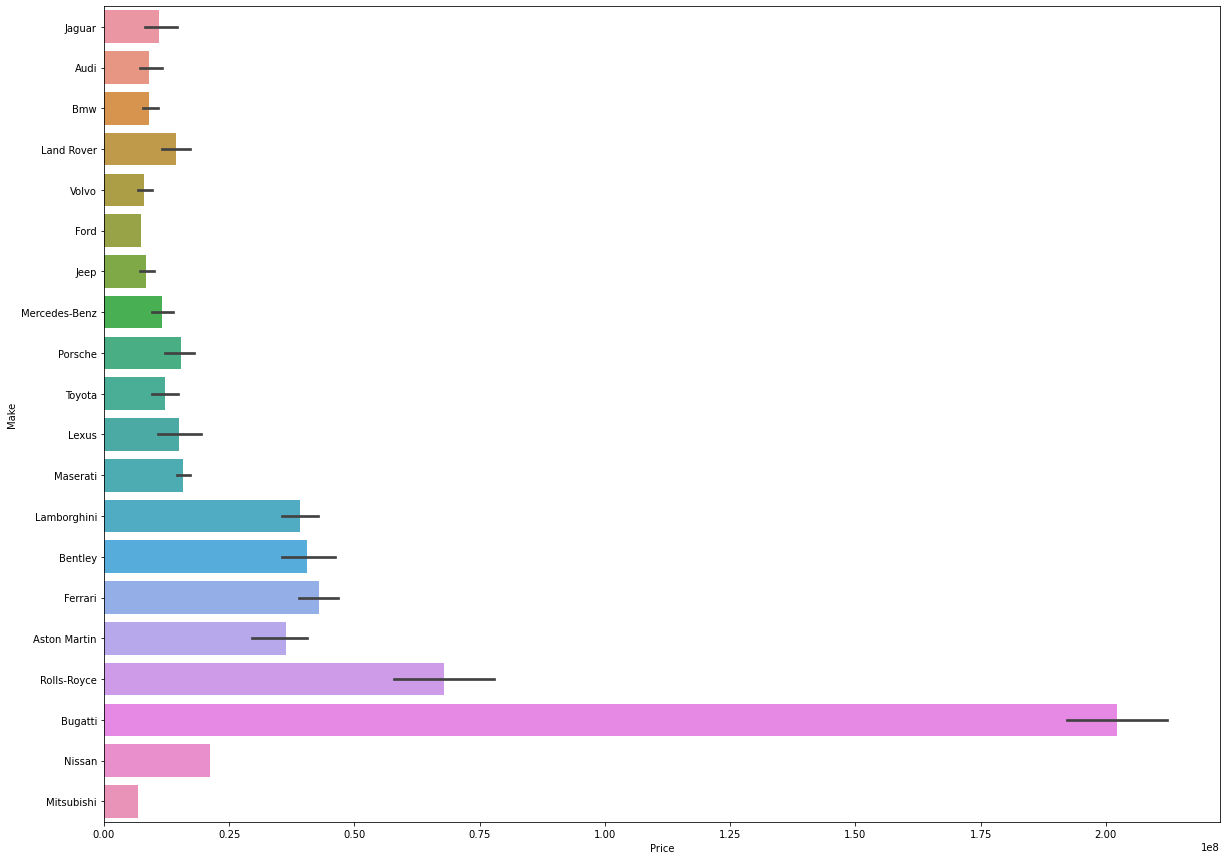

In [152]:
plt.figure(figsize=(20,15));
sns.barplot(x="Price",y="Make",data=df_a,orient='h');

# Find out the number of cars whose price is less than average car price ?

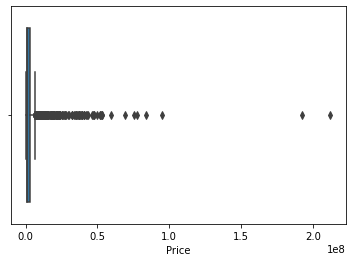

In [217]:
sns.boxplot(x="Price",data=df);

In [218]:
df[df["Price"]>150000000]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
355,16.0,2.0,2.0,6.0,Bugatti,Chiron,W16,192142937.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1479.0,1600.0,Digital,Digital,Digital,Yes,Petrol,5.95,MacPherson Strut,Torsion Beam,179.608916,387.5852,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not-present,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1600.0,1479.0,Digital,Digital,Digital,Yes,Petrol,5.95,Runflat,Runflat,179.608916,387.5852,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not-present,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [219]:
x=df[df["Price"]<150000000]
x

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,18.646876,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
3,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xta,334768.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,21.900000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,94.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-present,not-present,Yes,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
4,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xm,272223.0,624.0,RWD (Rear Wheel Drive),BS IV,not-present,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Manual Adjustment,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [223]:
x["Price"].mean()

4286408.171114599

In [1719]:
df.corr()["Price"]

Cylinders                 0.817001
Doors                    -0.460311
Seating_Capacity         -0.307150
Number_of_Airbags         0.335710
Price                     1.000000
Displacement              0.793245
Power                     0.743529
Torque                    0.702175
ARAI_Certified_Mileage   -0.207363
Ground_Clearance         -0.012123
Boot_Space                0.049544
Name: Price, dtype: float64

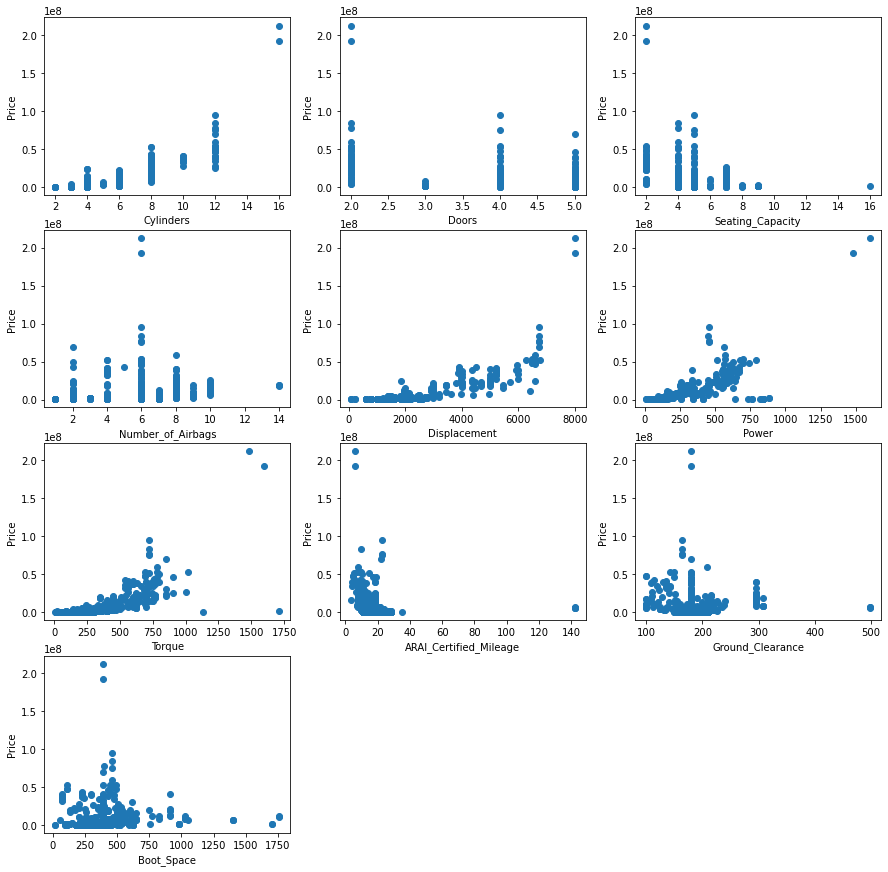

In [1720]:
numeric=["int32","float64"]
n=1
plt.figure(figsize=(15,15))
for i in df.select_dtypes(include=numeric):
    if i!="Price":
        plt.subplot(4,3,n)
        plt.scatter(df[i],df["Price"])
        plt.xlabel(i)
        plt.ylabel("Price")
        n=n+1

# We can visually see the scatter plot without outliers .

In [ ]:
# Scatterplot of x dataset

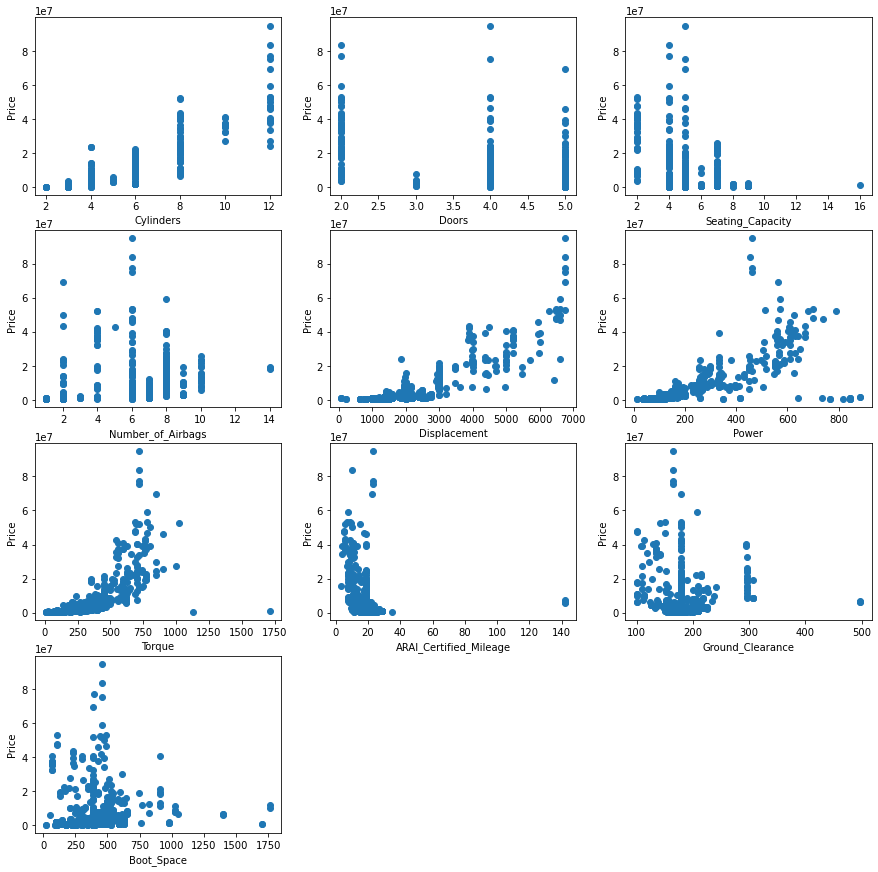

In [1721]:
numeric=["int32","float64"]
n=1
plt.figure(figsize=(15,15))
for i in df.select_dtypes(include=numeric):
    if i!="Price":
        plt.subplot(4,3,n)
        plt.scatter(x[i],x["Price"])
        plt.xlabel(i)
        plt.ylabel("Price")
        n=n+1

In [1722]:
a=["int32","float64"]
numeric=df.select_dtypes(include=a)
numeric

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Price,Displacement,Power,Torque,ARAI_Certified_Mileage,Ground_Clearance,Boot_Space
0,2.0,5.0,4.0,2.0,292667.0,624.0,38.0,51.0,23.600000,180.0,110.0
1,2.0,5.0,4.0,2.0,236447.0,624.0,38.0,51.0,23.600000,180.0,110.0
2,2.0,4.0,4.0,2.0,296661.0,624.0,38.0,51.0,18.646876,180.0,110.0
3,2.0,5.0,4.0,2.0,334768.0,624.0,38.0,51.0,21.900000,180.0,94.0
4,2.0,5.0,4.0,2.0,272223.0,624.0,38.0,51.0,23.600000,180.0,110.0
...,...,...,...,...,...,...,...,...,...,...,...
1271,4.0,4.0,5.0,2.0,1302000.0,1498.0,100.0,200.0,25.100000,165.0,510.0
1272,4.0,4.0,5.0,6.0,1421000.0,1498.0,100.0,200.0,25.100000,165.0,510.0
1273,4.0,4.0,5.0,6.0,1431000.0,1497.0,119.0,145.0,22.600000,165.0,510.0
1274,4.0,4.0,5.0,2.0,1201000.0,1497.0,119.0,145.0,17.800000,165.0,510.0


In [1723]:
# sns.pairplot(numeric);

# How many cars of each company ?

In [1725]:
df["Make"].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Mercedes-Benz     57
Skoda             43
Ford              43
Land Rover        37
Bmw               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Datsun            24
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Porsche           14
Mg                13
Lamborghini       13
Icml              11
Mini              10
Lexus             10
Maserati           9
Rolls-Royce        9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: Make, dtype: int64

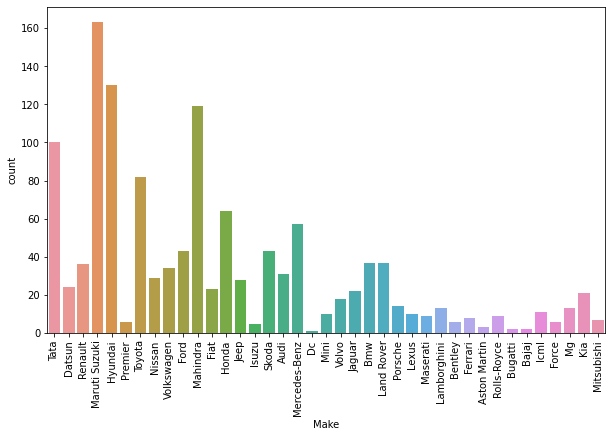

In [1726]:
plt.figure(figsize=(10,6));
sns.countplot(x="Make",data=df);
plt.xticks(rotation=90);

In [1727]:
# Most demanding cars of the customer is maruti suzuki , hundai , mahindra .
# Least demanding cars is Dc , Bajaj .

# Find the maximum , minimum ,and averaage price of different car company ?

In [1728]:
x=df.groupby("Make")["Price"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False).reset_index()
x

,Make,min,max,mean
0,Bugatti,192142937.0,212155397.0,2.021492e+08
1,Rolls-Royce,46709733.0,95000000.0,6.779633e+07
2,Ferrari,35000000.0,52000000.0,4.287250e+07
3,Bentley,33791059.0,52571294.0,4.056585e+07
4,Lamborghini,30000000.0,53210327.0,3.905392e+07
5,Aston Martin,29500000.0,40456503.0,3.626744e+07
6,Maserati,13387856.0,19865675.0,1.569689e+07
7,Porsche,6998000.0,22613000.0,1.534600e+07
8,Lexus,5695000.0,23290000.0,1.501530e+07
9,Land Rover,5494000.0,40499548.0,1.429447e+07


In [1729]:
# Most expensive car is Buggati 

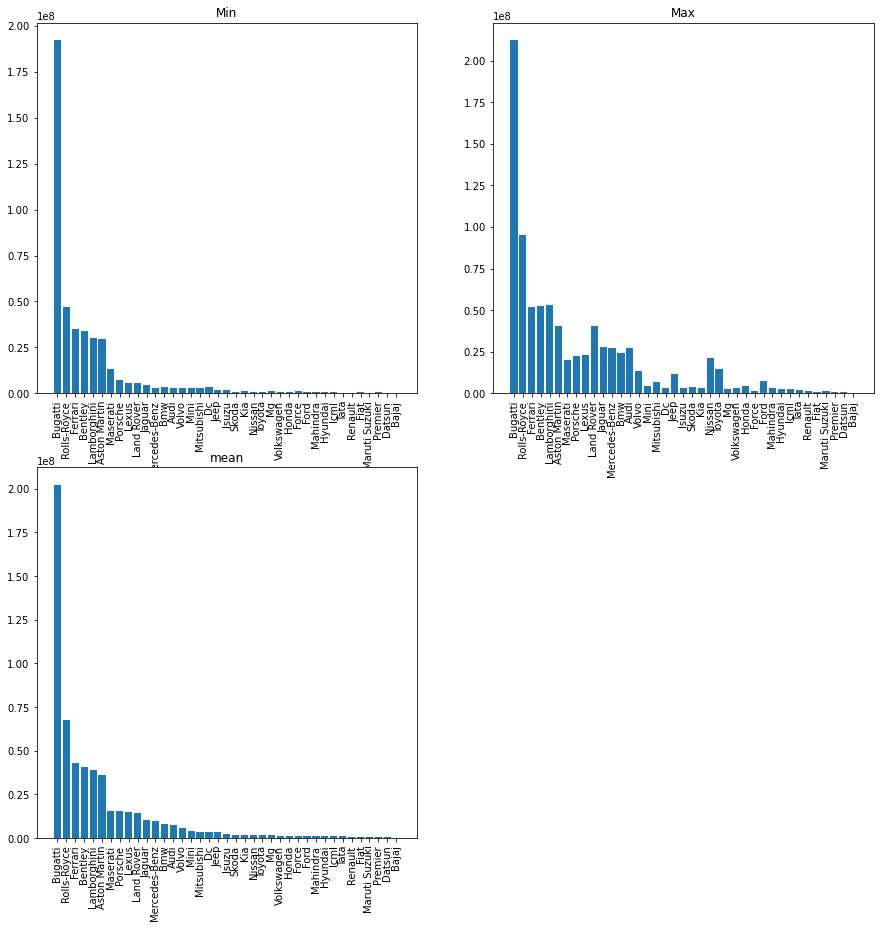

In [1730]:
plt.figure(figsize=(15,15));
plt.subplot(2,2,1);
plt.bar(x["Make"],x["min"]);
plt.title("Min");
plt.xticks(rotation=90);
plt.subplot(2,2,2);
plt.bar(x["Make"],x["max"]);
plt.title("Max");
plt.xticks(rotation=90);
plt.subplot(2,2,3);
plt.bar(x["Make"],x["mean"]);
plt.title("mean");
plt.xticks(rotation=90);

# Find the details of above top 3 companies car ?

In [1731]:
len(df[((df["Make"]=="Bugatti")|(df["Make"]=="Ferrari")|(df["Make"]=="Rolls-Royce"))])

19

In [1732]:
df["Make"].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz', 'Dc',
       'Mini', 'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Rolls-Royce', 'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Mitsubishi'], dtype=object)

# Now we will find the why most expensive car price is high based on the features ?

In [1733]:
grp=df.groupby(["Make"])["Cylinders","Displacement","Torque","Power"]

C:\Users\hp\AppData\Local\Temp\ipykernel_6316\581972524.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp=df.groupby(["Make"])["Cylinders","Displacement","Torque","Power"]


In [1734]:
grp.get_group("Bugatti")

,Cylinders,Displacement,Torque,Power
355,16.0,7993.0,1600.0,1479.0
356,16.0,7993.0,1479.0,1600.0


In [1735]:
grp.get_group("Ferrari")

,Cylinders,Displacement,Torque,Power
344,8.0,3855.0,755.0,560.0
348,8.0,4497.0,540.0,605.0
872,8.0,3902.0,760.0,670.0
873,8.0,3902.0,760.0,670.0
874,8.0,3900.0,760.0,610.0
875,8.0,6262.0,697.0,681.0
1058,12.0,6496.0,718.0,789.0
1172,8.0,3902.0,760.0,669.0


In [1736]:
grp.get_group("Rolls-Royce")

,Cylinders,Displacement,Torque,Power
349,12.0,6593.0,780.0,563.0
350,12.0,6592.0,780.0,570.0
351,12.0,6592.0,800.0,625.0
353,12.0,6750.0,850.0,563.0
354,12.0,6749.0,720.0,460.0
879,12.0,6598.0,780.0,571.0
880,12.0,6749.0,720.0,453.0
1219,12.0,6749.0,720.0,460.0
1220,12.0,6749.0,720.0,460.0


In [1738]:
df.groupby(["Make"])["Number_of_Airbags"].agg(["min","max","mean"]).sort_values(by="mean",ascending=False)

,min,max,mean
Make,,,
Lexus,8.0,14.0,10.600000
Audi,4.0,10.0,7.580645
Land Rover,2.0,10.0,7.486486
Aston Martin,6.0,8.0,7.333333
Mercedes-Benz,2.0,10.0,7.192982
Bmw,4.0,10.0,7.054054
Porsche,4.0,10.0,7.000000
Volvo,6.0,8.0,6.611111
Bugatti,6.0,6.0,6.000000


# Taking these feature only 

In [1740]:
extra_features = ["Navigation_System","Second_Row_AC_Vents","ESP_(Electronic_Stability_Program)","Cooled_Glove_Box","Turbocharger","Rain_Sensing_Wipers","Automatic_Headlamps","Cruise_Control","Make","Price","EBA_(Electronic_Brake_Assist)","EBD_(Electronic_Brake-force_Distribution)","ABS_(Anti-lock_Braking_System)","Gear_Indicator","Auto-Dimming_Rear-View_Mirror","Hill_Assist","Key_Off_Reminder","USB_Compatibility","Model"]
extra_features



['Navigation_System',
 'Second_Row_AC_Vents',
 'ESP_(Electronic_Stability_Program)',
 'Cooled_Glove_Box',
 'Turbocharger',
 'Rain_Sensing_Wipers',
 'Automatic_Headlamps',
 'Cruise_Control',
 'Make',
 'Price',
 'EBA_(Electronic_Brake_Assist)',
 'EBD_(Electronic_Brake-force_Distribution)',
 'ABS_(Anti-lock_Braking_System)',
 'Gear_Indicator',
 'Auto-Dimming_Rear-View_Mirror',
 'Hill_Assist',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Model']

In [1741]:
df2=df[extra_features]
df2

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility,Model
0,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,292667.0,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Nano Genx
1,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,236447.0,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Nano Genx
2,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,296661.0,not-present,not-present,not-present,not-present,Yes,Yes,not-present,not-present,Nano Genx
3,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,334768.0,not-present,not-present,not-present,Yes,not-present,not-present,not-present,not-present,Nano Genx
4,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,272223.0,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Nano Genx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Yes,Yes,not-present,not-present,Yes,not-present,not-present,Yes,Honda,1302000.0,not-present,Yes,Yes,not-present,Yes,not-present,Yes,Yes,City
1272,Yes,Yes,not-present,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not-present,Yes,Yes,not-present,Yes,not-present,Yes,Yes,City
1273,Yes,Yes,not-present,not-present,not-present,not-present,Yes,Yes,Honda,1431000.0,not-present,Yes,Yes,not-present,Yes,not-present,Yes,Yes,City
1274,Yes,Yes,not-present,not-present,not-present,not-present,not-present,Yes,Honda,1201000.0,not-present,Yes,Yes,not-present,Yes,not-present,Yes,Yes,City


In [1742]:
df3=df2.copy()
df3.set_index("Model",inplace=True)
df3

,Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,Cruise_Control,Make,Price,EBA_(Electronic_Brake_Assist),EBD_(Electronic_Brake-force_Distribution),ABS_(Anti-lock_Braking_System),Gear_Indicator,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Key_Off_Reminder,USB_Compatibility
Model,,,,,,,,,,,,,,,,,,
Nano Genx,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,292667.0,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
Nano Genx,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,236447.0,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
Nano Genx,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,296661.0,not-present,not-present,not-present,not-present,Yes,Yes,not-present,not-present
Nano Genx,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,334768.0,not-present,not-present,not-present,Yes,not-present,not-present,not-present,not-present
Nano Genx,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present,Tata,272223.0,not-present,not-present,not-present,not-present,not-present,not-present,not-present,not-present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City,Yes,Yes,not-present,not-present,Yes,not-present,not-present,Yes,Honda,1302000.0,not-present,Yes,Yes,not-present,Yes,not-present,Yes,Yes
City,Yes,Yes,not-present,Yes,Yes,Yes,Yes,Yes,Honda,1421000.0,not-present,Yes,Yes,not-present,Yes,not-present,Yes,Yes
City,Yes,Yes,not-present,not-present,not-present,not-present,Yes,Yes,Honda,1431000.0,not-present,Yes,Yes,not-present,Yes,not-present,Yes,Yes


In [1743]:
df3.index

Index(['Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx', 'Nano Genx',
       'Nano Genx', 'Redi-Go', 'Redi-Go', 'Redi-Go', 'Redi-Go',
       ...
       'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City', 'City',
       'Montero'],
      dtype='object', name='Model', length=1276)

In [1744]:
df3.values

array([['not-present', 'not-present', 'not-present', ..., 'not-present',
        'not-present', 'not-present'],
       ['not-present', 'not-present', 'not-present', ..., 'not-present',
        'not-present', 'not-present'],
       ['not-present', 'not-present', 'not-present', ..., 'Yes',
        'not-present', 'not-present'],
       ...,
       ['Yes', 'Yes', 'not-present', ..., 'not-present', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'not-present', ..., 'not-present', 'Yes', 'Yes'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes']], dtype=object)

In [1745]:
# Zip

In [1746]:
for i,j in zip(df3.index,df3.values):
    print(i,"====>",j)

Nano Genx ====> ['not-present' 'not-present' 'not-present' 'not-present' 'not-present'
 'not-present' 'not-present' 'not-present' 'Tata' 292667.0 'not-present'
 'not-present' 'not-present' 'not-present' 'not-present' 'not-present'
 'not-present' 'not-present']
Nano Genx ====> ['not-present' 'not-present' 'not-present' 'not-present' 'not-present'
 'not-present' 'not-present' 'not-present' 'Tata' 236447.0 'not-present'
 'not-present' 'not-present' 'not-present' 'not-present' 'not-present'
 'not-present' 'not-present']
Nano Genx ====> ['not-present' 'not-present' 'not-present' 'not-present' 'not-present'
 'not-present' 'not-present' 'not-present' 'Tata' 296661.0 'not-present'
 'not-present' 'not-present' 'not-present' 'Yes' 'Yes' 'not-present'
 'not-present']
Nano Genx ====> ['not-present' 'not-present' 'not-present' 'not-present' 'not-present'
 'not-present' 'not-present' 'not-present' 'Tata' 334768.0 'not-present'
 'not-present' 'not-present' 'Yes' 'not-present' 'not-present'
 'not-pres

 'not-present' 'Yes' 'Yes' 'not-present']
Mercedes-Benz Gls ====> ['Yes' 'Yes' 'Yes' 'not-present' 'not-present' 'Yes' 'not-present' 'Yes'
 'Mercedes-Benz' 8776900.0 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']
Mercedes-Benz Gls ====> ['Yes' 'Yes' 'Yes' 'Yes' 'not-present' 'Yes' 'Yes' 'Yes' 'Mercedes-Benz'
 8690000.0 'Yes' 'Yes' 'Yes' 'Yes' 'not-present' 'Yes' 'Yes' 'Yes']
Mercedes-Benz Gls ====> ['Yes' 'Yes' 'Yes' 'Yes' 'not-present' 'Yes' 'Yes' 'Yes' 'Mercedes-Benz'
 8690000.0 'Yes' 'Yes' 'Yes' 'Yes' 'not-present' 'Yes' 'Yes' 'Yes']
Land Cruiser Prado ====> ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Toyota' 9630000.0 'Yes'
 'Yes' 'Yes' 'Yes' 'not-present' 'Yes' 'Yes' 'Yes']
Rx 450H ====> ['Yes' 'Yes' 'Yes' 'not-present' 'not-present' 'Yes' 'Yes' 'Yes' 'Lexus'
 9900000.0 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']
Rs5 ====> ['Yes' 'Yes' 'Yes' 'Yes' 'not-present' 'Yes' 'Yes' 'Yes' 'Audi' 11141200.0
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']
7-Series ====> ['Yes' 

Thar ====> ['not-present' 'not-present' 'not-present' 'Yes' 'Yes' 'not-present'
 'not-present' 'not-present' 'Mahindra' 999148.0 'not-present'
 'not-present' 'Yes' 'not-present' 'Yes' 'not-present' 'not-present' 'Yes']
Thar ====> ['not-present' 'not-present' 'not-present' 'not-present' 'Yes'
 'not-present' 'not-present' 'not-present' 'Mahindra' 974860.0
 'not-present' 'not-present' 'Yes' 'not-present' 'Yes' 'not-present'
 'not-present' 'not-present']
Gurkha ====> ['not-present' 'not-present' 'not-present' 'not-present' 'Yes'
 'not-present' 'not-present' 'not-present' 'Force' 999000.0 'not-present'
 'not-present' 'not-present' 'not-present' 'Yes' 'not-present'
 'not-present' 'not-present']
Gurkha ====> ['not-present' 'not-present' 'not-present' 'not-present' 'Yes'
 'not-present' 'not-present' 'not-present' 'Force' 1075000.0 'not-present'
 'not-present' 'not-present' 'not-present' 'Yes' 'not-present'
 'not-present' 'not-present']
Gurkha ====> ['not-present' 'not-present' 'not-present' 'n

 'not-present' 'not-present' 'Yes']
Grand I10 Nios ====> ['Yes' 'Yes' 'not-present' 'Yes' 'Yes' 'not-present' 'not-present'
 'not-present' 'Hyundai' 718950.0 'not-present' 'Yes' 'Yes' 'Yes' 'Yes'
 'not-present' 'not-present' 'Yes']
Grand I10 Nios ====> ['not-present' 'Yes' 'not-present' 'Yes' 'Yes' 'not-present' 'not-present'
 'not-present' 'Hyundai' 790350.0 'not-present' 'Yes' 'Yes' 'Yes' 'Yes'
 'not-present' 'not-present' 'Yes']
Grand I10 Nios ====> ['Yes' 'Yes' 'not-present' 'Yes' 'Yes' 'not-present' 'not-present'
 'not-present' 'Hyundai' 804450.0 'not-present' 'Yes' 'Yes' 'Yes' 'Yes'
 'not-present' 'Yes' 'Yes']
Xcent ====> ['not-present' 'Yes' 'not-present' 'Yes' 'not-present' 'not-present'
 'not-present' 'not-present' 'Hyundai' 643769.0 'not-present' 'Yes' 'Yes'
 'Yes' 'Yes' 'not-present' 'Yes' 'Yes']
Xcent ====> ['not-present' 'Yes' 'not-present' 'Yes' 'not-present' 'not-present'
 'not-present' 'not-present' 'Hyundai' 733734.0 'not-present' 'Yes' 'Yes'
 'not-present' 'Yes' 'not-

In [1747]:
for i,j in zip(df3.index,df3.values):
    c=0
    l=[]
    for k in j:
        if type(k)==str:
            if k=="Yes":
                c=c+1
                l.append(k)
    print(i,c,j[9])

Nano Genx 0 292667.0
Nano Genx 0 236447.0
Nano Genx 2 296661.0
Nano Genx 1 334768.0
Nano Genx 0 272223.0
Nano Genx 1 314815.0
Redi-Go 1 279650.0
Redi-Go 1 351832.0
Redi-Go 0 333419.0
Redi-Go 0 362000.0
Redi-Go 0 390000.0
Redi-Go 1 437065.0
Kwid 4 353290.0
Kwid 4 283290.0
Kwid 5 383290.0
Kwid 6 413290.0
Kwid 5 433290.0
Kwid 5 454490.0
Kwid 8 463290.0
Kwid 7 484490.0
Kwid 5 440990.0
Kwid 5 470990.0
Kwid 5 462190.0
Kwid 7 492190.0
Eeco 3 352136.0
Eeco 3 380573.0
Eeco 1 392967.0
Eeco 3 466057.0
Eeco 3 425255.0
Alto K10 3 377588.0
Alto K10 5 394036.0
Alto K10 3 360843.0
Alto K10 3 407238.0
Alto K10 1 439777.0
Alto K10 4 438559.0
Go 5 374990.0
Go 7 468229.0
Go 7 502492.0
Go 5 499990.0
Go 5 469990.0
Go 7 528464.0
Go 7 553015.0
Go 7 594464.0
Go 7 618015.0
Celerio Tour 3 422444.0
Celerio Tour 2 480670.0
Santro 5 429990.0
Santro 5 503990.0
Santro 6 547990.0
Santro 6 530990.0
Santro 7 512990.0
Santro 8 578990.0
Santro 7 570990.0
Santro 7 556490.0
Tiago 6 460000.0
Tiago 9 520000.0
Tiago 9 570000.0

Venue 9 850000.0
Venue 12 983000.0
Venue 14 998000.0
Venue 14 1089000.0
Nexon 6 695000.0
Nexon 7 770000.0
Nexon 10 870000.0
Nexon 10 950000.0
Nexon 8 970000.0
Nexon 8 1040000.0
Nexon 11 1060000.0
Nexon 8 830000.0
Nexon 11 1010000.0
Nexon 11 1030000.0
Nexon 11 1100000.0
Nexon 11 1120000.0
Nexon 6 845000.0
Nexon 7 920000.0
Nexon 9 1020000.0
Nexon 11 1100000.0
Nexon 9 1120000.0
Nexon 9 1190000.0
Nexon 9 1210000.0
Nexon 8 980000.0
Nexon 10 1160000.0
Nexon 10 1180000.0
Nexon 10 1250000.0
Nexon 10 1270000.0
Linea 5 715860.0
Linea 5 862175.0
Linea 7 932025.0
Linea 8 991434.0
Linea 6 997763.0
Bolero Power Plus 3 886398.0
Bolero Power Plus 3 851302.0
Bolero Power Plus 2 785656.0
Bolero Power Plus 4 749192.0
Bolero Power Plus 2 859497.0
Bolero Power Plus 2 819117.0
Vitara Brezza 4 762742.0
Vitara Brezza 6 814742.0
Vitara Brezza 10 892243.0
Vitara Brezza 12 987743.0
Vitara Brezza 12 1003552.0
Vitara Brezza 12 1037742.0
Vitara Brezza 6 864742.0
Vitara Brezza 10 942243.0
Vitara Brezza 12 1059742.0


Grand I10 4 653452.0
Linea Classic 2 751203.0
Linea Classic 1 646336.0
Linea Classic 4 808558.0
Sunny 4 707025.0
Sunny 6 836461.0
Sunny 6 912534.0
Sunny 6 993997.0
Sunny 4 860997.0
Sunny 6 993997.0
Sunny 6 877285.0
Ertiga 5 759000.0
Ertiga 8 917000.0
Ertiga 8 936000.0
Ertiga 9 971000.0
Ertiga 5 834000.0
Ertiga 11 1013000.0
Ertiga 9 986689.0
Ertiga 9 1069689.0
Ertiga 10 1120689.0
Ertiga 5 887689.0
Baleno Rs 8 788913.0
Wr-V 9 1035000.0
Wr-V 8 925000.0
Wr-V 8 925000.0
Wr-V 7 815000.0
Wr-V 8 916050.0
Wr-V 7 808050.0
Wr-V 8 1048050.0
Wr-V 7 935050.0
Wr-V 10 995000.0
Tuv300 4 854328.0
Tuv300 5 914328.0
Tuv300 5 976592.0
Tuv300 6 999614.0
Tuv300 6 1031943.0
Tuv300 6 1022930.0
Tuv300 6 1055259.0
S-Cross 4 880689.0
S-Cross 6 992689.0
S-Cross 7 1043689.0
S-Cross 9 1143689.0
Captur 8 949999.0
Captur 9 1049999.0
Captur 15 1299999.0
Captur 12 1199999.0
Xylo 2 963037.0
Xylo 1 1004487.0
Xylo 1 1031951.0
Xylo 2 1066139.0
Xylo 3 1228335.0
Seltos 6 989000.0
Seltos 6 1029000.0
Seltos 11 1149000.0
Seltos 

# Data Prepration 

In [1748]:
df.shape

(1276, 49)

In [1749]:
df["Make"].nunique()

39

In [1750]:
df["Model"].nunique()

263

In [1751]:
df["Variant"].nunique()

1064

In [1752]:
for i in df.columns:
    print(i,"====>",df[i].unique(),"=",df[i].nunique(),"\n")

Cylinders ====> [ 2.  3.  4.  5.  6.  8. 12. 10. 16.] = 9 

Doors ====> [5. 4. 2. 3.] = 4 

Seating_Capacity ====> [ 4.  5.  7.  2.  6.  9.  8. 16.] = 8 

Number_of_Airbags ====> [ 2.  1.  4.  6.  9.  8.  7. 10.  5.  3. 14.] = 11 

Make ====> ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Mitsubishi'] = 39 

Model ====> ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Santro' 'Tiago' 'Celerio X' 'Ignis' 'Triber' 'Rio' 'Etios Liva'
 'Micra Active' 'Bolt' 'Xcent Prime' 'Dzire Tour' 'Elite I20' 'Aura'
 'Polo' 'Dzire' 'Freestyle' 'Ameo' 'Aspire' 'Platinum Etios' 'Etios Cross'
 'Verito Vibe' 'Urban Cross' 'Glanza' 'Avventura' 'Jazz'
 'Compass Trailhawk' 'Mu-X'

In [1754]:
df.columns

Index(['Cylinders', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Make',
       'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Au

# Dropping features which are not required.

In [1755]:
df.drop(columns=["Make","Tachometer","Tripmeter","Front_Suspension","Rear_Suspension","Audiosystem","Third_Row_AC_Vents","Ventilation_System","Key_Off_Reminder"],inplace=True)


In [1756]:
df.drop(columns=["Cooled_Glove_Box","Rain_Sensing_Wipers","Gear_Shift_Reminder"],inplace=True)

In [1757]:
df.shape

(1276, 37)

# Doing encoding of categorical column.

In [1759]:
df["Navigation_System"].unique()

array(['not-present', 'Yes'], dtype=object)

In [1760]:
l = ['Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)',
       'Turbocharger','Automatic_Headlamps',
       'Cruise_Control','EBA_(Electronic_Brake_Assist)',
       'EBD_(Electronic_Brake-force_Distribution)',
       'ABS_(Anti-lock_Braking_System)','Gear_Indicator',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'USB_Compatibility',"ASR_/_Traction_Control"]
for i in l:
    df[i].replace({"Yes":1,"not-present":0},inplace=True)
df.head(3)


,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,...,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,...,0,Manual Adjustment,0,0,not-present,0,0,0,0,0
1,2.0,5.0,4.0,2.0,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,...,0,Manual Adjustment,0,0,not-present,0,0,0,0,0
2,2.0,4.0,4.0,2.0,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,...,0,Manual Adjustment,0,0,not-present,0,0,0,0,0


In [1761]:
df["Navigation_System"].unique()

array([0, 1], dtype=int64)

In [1762]:
df["Drivetrain"].unique()

array(['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)',
       'AWD (All Wheel Drive)', '4WD'], dtype=object)

In [1763]:
df["Drivetrain"]=df["Drivetrain"].replace({"RWD (Rear Wheel Drive)":0,"FWD (Front Wheel Drive)":1,"AWD (All Wheel Drive)":2,"4WD":3})

In [1764]:
df["Drivetrain"].unique()

array([0, 1, 2, 3], dtype=int64)

In [1765]:
df["Emission_Norm"].unique()

array(['BS IV', 'BS 6', 'BS III', 'BS VI'], dtype=object)

In [1766]:
df["Emission_Norm"]=df["Emission_Norm"].replace({"BS 6":"BS VI"})

In [1767]:
df["Emission_Norm"]=df["Emission_Norm"].replace({"BS IV":1,"BS III":0,"BS VI":2})

In [1768]:
df["Emission_Norm"].unique()

array([1, 2, 0], dtype=int64)

In [1769]:
df["Keyless_Entry"].unique()

array(['Remote', 'not-present', 'Yes', 'Smart Key', 'Remote, Smart Key',
       'Smart Key, Remote'], dtype=object)

In [1770]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace({"Remote, Smart Key":"Smart Key, Remote"})

In [1771]:
df["Keyless_Entry"]=df["Keyless_Entry"].replace({"not-present":0,"Remote":1,"Yes":2,"Smart Key":3,"Smart Key, Remote":4})

In [1772]:
df["Keyless_Entry"].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [1773]:
df["Odometer"].unique()

array(['Digital', 'Analog', 'not-present', 'Digital, Analog', 'Yes'],
      dtype=object)

In [1774]:
df["Odometer"]=df["Odometer"].replace({"Digital":0,"Analog":1,"Digital, Analog":2,"not-present":3,"Yes":4})


In [1775]:
df["Odometer"].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [1776]:
df["Speedometer"].unique()

array(['Analog', 'Digital', 'Analog, Digital', 'Digital, Analog',
       'not-present', 'Yes'], dtype=object)

In [1777]:
df["Speedometer"]=df["Speedometer"].replace("Digital, Analog","Analog, Digital")


In [1778]:
df["Speedometer"]=df["Speedometer"].replace({"Analog":0,"Digital":1,"Analog, Digital":2,"not-present":3,"Yes":4})


In [1779]:
df["Speedometer"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [1780]:
df["Fuel_Type"].unique()

array(['Petrol', 'CNG', 'Diesel', 'CNG + Petrol', 'Hybrid', 'Electric'],
      dtype=object)

In [1781]:
df["Fuel_Type"]=df["Fuel_Type"].replace({"Petrol":0,"CNG":1,"Diesel":2,"CNG + Petrol":3,"Hybrid":4,"Electric":5})


In [1782]:
df["Fuel_Type"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

# Droping un-required features

In [1783]:
df.drop(columns=["Seat_Height_Adjustment","Adjustable_Steering_Column","Rear_Center_Armrest"],inplace=True)


In [1784]:
df.columns

Index(['Cylinders', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Model',
       'Variant', 'Price', 'Displacement', 'Drivetrain', 'Emission_Norm',
       'Keyless_Entry', 'Power', 'Torque', 'Odometer', 'Speedometer',
       'Fuel_Type', 'ARAI_Certified_Mileage', 'Ground_Clearance', 'Boot_Space',
       'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator',
       'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Parking_Assistance',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Navigation_System', 'Second_Row_AC_Vents',
       'ESP_(Electronic_Stability_Program)', 'Turbocharger',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
      dtype='object')

In [1785]:
df["Parking_Assistance"].unique()

array(['not-present', 'Rear sensors', 'Rear sensors with camera',
       'Front and rear sensors with camera',
       'Rear sensors, Rear sensors with camera',
       'Rear sensors with camera, Rear sensors', 'Yes',
       'Front & rear sensors with 360 degree view',
       'Front sensors, Rear sensors', 'Rear sensors, Front sensors',
       'Front and rear sensors with camera, Front & rear sensors with 360 degree view'],
      dtype=object)

In [1786]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({"Rear sensors, Rear sensors with camera":"Rear sensors with camera","Rear sensors with camera, Rear sensors":"Rear sensors with camera","Front sensors, Rear sensors":"Rear sensors, Front sensors","Front and rear sensors with camera, Front & rear sensors with 360 degree view":"Front & rear sensors with 360 degree view"})


In [1787]:
df["Parking_Assistance"].unique()

array(['not-present', 'Rear sensors', 'Rear sensors with camera',
       'Front and rear sensors with camera', 'Yes',
       'Front & rear sensors with 360 degree view',
       'Rear sensors, Front sensors'], dtype=object)

In [1788]:
df["Parking_Assistance"]=df["Parking_Assistance"].replace({"not-present":0 ,"Rear sensors":1,"Rear sensors with camera":2,"Front and rear sensors with camera":3,"Yes":4,"Front & rear sensors with 360 degree view":5,"Rear sensors, Front sensors":6})

In [1789]:
df["Parking_Assistance"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

# Using mean target encoding of Make and Model and Variant Column.

In [1790]:
df2=df.groupby(['Model'])["Price"].agg(["mean"]).reset_index()
df2

,Model,mean
0,3-Series,4.540000e+06
1,458 Speciale,4.253150e+07
2,458 Spider,4.336750e+07
3,488 Gtb,3.804048e+07
4,5-Series,6.196667e+06
...,...,...
258,Xylo,1.058790e+06
259,Yaris,1.124571e+06
260,Z4 Roadster,7.190000e+06
261,Zest,7.613608e+05


In [1791]:
l=[]
for i in df["Model"]:
    for j, k in df2.iterrows():
        if i==k["Model"]:
            l.append(k["mean"])

In [1792]:
df["Model"]=l
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,...,Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,Xt,292667.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,Xe,236447.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,Emax Xm,296661.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,Xta,334768.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,Xm,272223.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1584]:
df["Model"].head()

0    Nano Genx
1    Nano Genx
2    Nano Genx
3    Nano Genx
4    Nano Genx
Name: Model, dtype: object

In [1793]:
df2=df.groupby(['Variant'])["Price"].agg(["mean"]).reset_index()
df2

,Variant,mean
0,1.0 S,3.900000e+05
1,1.0 S Amt,4.370650e+05
2,1.0 Turbo Gdi Dct S,9.400000e+05
3,1.0 Turbo Gdi Dct Sx Plus,1.115500e+06
4,1.0 Turbo Gdi Mt S,8.260000e+05
...,...,...
1059,Zxi Amt,6.338675e+05
1060,Zxi Amt (O),5.523500e+05
1061,Zxi At,8.960565e+05
1062,Zxi Plus,8.502043e+05


In [1794]:
l=[]
for i in df["Variant"]:
    for j, k in df2.iterrows():
        if i==k["Variant"]:
            l.append(k["mean"])

In [1795]:
df["Variant"]=l
df.head()

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,...,Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,292667.0,292667.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,465723.5,236447.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,4.0,2.0,291263.5,296661.0,296661.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,5.0,4.0,2.0,291263.5,334768.0,334768.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,5.0,4.0,2.0,291263.5,813741.0,272223.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1796]:
df.shape

(1276, 34)

In [1797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Cylinders                                  1276 non-null   float64
 1   Doors                                      1276 non-null   float64
 2   Seating_Capacity                           1276 non-null   float64
 3   Number_of_Airbags                          1276 non-null   float64
 4   Model                                      1276 non-null   float64
 5   Variant                                    1276 non-null   float64
 6   Price                                      1276 non-null   float64
 7   Displacement                               1276 non-null   float64
 8   Drivetrain                                 1276 non-null   int64  
 9   Emission_Norm                              1276 non-null   int64  
 10  Keyless_Entry           

In [1798]:
df.head(2)

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,...,Parking_Assistance,USB_Compatibility,EBA_(Electronic_Brake_Assist),Navigation_System,Second_Row_AC_Vents,ESP_(Electronic_Stability_Program),Turbocharger,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,291263.5,292667.0,292667.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2.0,5.0,4.0,2.0,291263.5,465723.5,236447.0,624.0,0,1,...,0,0,0,0,0,0,0,0,0,0


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>🎯 Model Creation & Evaluation 🎯</b></div>

---

# Seggregate Target and Features

In [1799]:
x=df.drop(columns=["Price"])
y=df["Price"]

In [1802]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [1805]:
df["Variant"].unique()

array([ 292667. ,  465723.5,  296661. , ..., 1421000. , 1431000. ,
       6862560. ])

In [1804]:
df["Model"].unique()

array([2.91263500e+05, 3.58994333e+05, 4.27923333e+05, 4.03397600e+05,
       4.03006833e+05, 5.12183222e+05, 4.51557000e+05, 5.29052500e+05,
       5.86000000e+05, 5.16714125e+05, 6.06634000e+05, 5.81500000e+05,
       6.37603833e+05, 6.59264286e+05, 5.62701333e+05, 6.58916000e+05,
       5.74315167e+05, 6.01962000e+05, 7.79543583e+05, 7.72500000e+05,
       8.14625000e+05, 7.81760214e+05, 7.25025000e+05, 8.13275000e+05,
       7.48939538e+05, 7.78180000e+05, 7.50000000e+05, 6.97928333e+05,
       8.01104750e+05, 7.79620000e+05, 7.94758000e+05, 8.61187500e+05,
       2.72000000e+06, 2.83318400e+06, 2.92015000e+06, 2.98400000e+06,
       3.05700100e+06, 3.02459900e+06, 3.07097500e+06, 3.14502650e+06,
       3.49000000e+06, 3.42593233e+06, 3.40740700e+06, 3.88178750e+06,
       3.60000000e+06, 3.83000000e+06, 4.12333333e+06, 4.12000000e+06,
       4.32800000e+06, 4.35000000e+06, 4.56550000e+06, 5.62645760e+06,
       5.03800000e+06, 5.69220000e+06, 5.80333333e+06, 5.89750000e+06,
      

In [1806]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [1807]:
lr=LinearRegression()

In [1810]:
knn=KNeighborsRegressor()

In [1811]:
r2score=[]
Models=[lr,knn]
for i in Models:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(i,x_scaled,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score    


[0.982489190524117, 0.859868618980277]

In [1812]:
dtc=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb=XGBRegressor()
adb=AdaBoostRegressor()


In [1813]:
Model=[dtc,rfr,gbr,xgb,adb]

In [1814]:
for i in Model:
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    scores = cross_val_score(i,x,y,scoring='r2',cv=cv,n_jobs=-1)
    r2=np.mean(scores)
    r2score.append(r2)
r2score    


[0.982489190524117,
 0.859868618980277,
 0.9708388343264435,
 0.9667590251181075,
 0.9771088716088194,
 0.9826991925891747,
 0.8990292977611514]

In [1815]:
Model_names=["LinearRegression","KNN","Decisiontree","randomforest","gradientboost","xgboost","adaboost"]
Model_s_evaluation = pd.DataFrame({'Regressor Models': Model_names, 'r square': r2score})
Model_s_evaluation


,Regressor Models,r square
0,LinearRegression,0.982489
1,KNN,0.859869
2,Decisiontree,0.970839
3,randomforest,0.966759
4,gradientboost,0.977109
5,xgboost,0.982699
6,adaboost,0.899029


<BarContainer object of 7 artists>

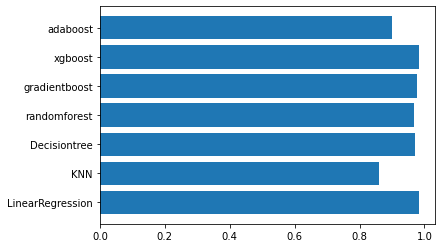

In [1816]:
plt.barh(Model_s_evaluation["Regressor Models"],Model_s_evaluation["r square"])


## The best algorithm for this model is Linear Regression.

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>✨ Finish ✨</b></div>